In [11]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
from pathlib import Path
import sys

sys.path.insert(1, str(Path().cwd().parent))
import common_config

In [13]:
common_config.figure_journal_basic()

In [14]:
sys.path.append('/Users/mamba/Documents') #TODO: replace with direct import
import Code.pertpy.pertpy as pt

In [36]:
#import pertpy as pt
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import numpy as np
import seaborn as sns
from gprofiler import GProfiler

In [16]:
fc_associations_df = pd.read_csv("dialogue_output/fc_associations.csv", index_col=0)
fc_associations_df.head(10)

mcp_0     mcp_1     mcp_2     mcp_3     mcp_4     mcp_5
AT1                0.987296  0.732264  0.576923  0.140111  0.982929  0.985627
AT2                0.987296  0.732264  0.884549  0.684876  0.982929  0.985627
Aberrant Basaloid  0.987296  0.732264  0.626813  0.173580  0.982929  0.985627
Basal              0.987296  0.732264  0.626813  0.181589  0.982929  0.985627
Ciliated           0.987296  0.732264  0.774174  0.140111  0.982929  0.985627
Secretory          0.987296  0.767196  0.626813  0.174454  0.982929  0.985627
capillary EC       0.987296  0.732264  0.288848  0.140111  0.982929  0.985627
ectopic EC         0.987296  0.732264  0.626813  0.187512  0.982929  0.985627
lymphatic EC       0.987296  0.732264  0.626813  0.133915  0.982929  0.985627
Fibroblasts        0.987296  0.732264  0.842231  0.187512  0.982929  0.985627

In [17]:
cmp4_associations_df = pd.read_csv("dialogue_output/cmp4_associations.csv", index_col=0)
cmp4_associations_df.head(10)

mcp_0     mcp_1     mcp_2     mcp_3     mcp_4     mcp_5
AT1                0.983856  0.932372  0.981531  0.697733  0.985454  0.999969
AT2                0.983856  0.959037  0.981531  0.976912  0.985454  0.999969
Aberrant Basaloid  0.983856  0.932372  0.981531  0.625120  0.985454  0.999969
Basal              0.983856  0.940059  0.981531  0.697733  0.985454  0.999969
Ciliated           0.983856  0.932372  0.981531  0.625120  0.985454  0.999969
Secretory          0.983856  0.932372  0.981531  0.697733  0.985454  0.999969
capillary EC       0.983856  0.932372  0.981531  0.723544  0.985454  0.999969
ectopic EC         0.983856  0.932372  0.981531  0.697733  0.985454  0.999969
lymphatic EC       0.983856  0.932372  0.981531  0.697733  0.985454  0.999969
Fibroblasts        0.983856  0.932372  0.981531  0.625120  0.985454  0.999969

In [18]:
nintedanib_associations_df = pd.read_csv("dialogue_output/nintedanib.csv", index_col=0)
nintedanib_associations_df.head(10)

mcp_0     mcp_1     mcp_2     mcp_3     mcp_4     mcp_5
AT1                0.983472  0.686173  0.732130  0.151546  0.946320  0.949496
AT2                0.983472  0.791126  0.732130  0.186364  0.922673  0.949496
Aberrant Basaloid  0.983472  0.686173  0.732130  0.186364  0.922673  0.949496
Basal              0.983472  0.794626  0.732130  0.181716  0.946320  0.949496
Ciliated           0.983472  0.686173  0.736432  0.181716  0.922673  0.949496
Secretory          0.983472  0.791126  0.732130  0.186364  0.946320  0.949496
capillary EC       0.983472  0.686173  0.636835  0.090626  0.922673  0.949496
ectopic EC         0.983472  0.791126  0.732130  0.151546  0.922673  0.949496
lymphatic EC       0.983472  0.686173  0.732130  0.090626  0.922673  0.949496
Fibroblasts        0.983472  0.686173  0.736432  0.181716  0.922673  0.949496

# Dotplots assessing MCP score per cell type

In [117]:
def plot_heatmap(associations_df, vmax=None, create_fig=True , cbar=True):
    log_associations_df = associations_df.copy()
    for mcp_nr in range(6):
        log_associations_df[f"mcp_{mcp_nr}"] = -1 * np.log10(log_associations_df[f"mcp_{mcp_nr}"])
    
    #if log_associations_df.max().max() > GLOBAL_MAX:
      #  GLOBAL_MAX = log_associations_df.max().max()
    
    if create_fig:
        plt.figure(figsize=(2.2, 6))
    if cbar:
        sns.heatmap(log_associations_df, vmin=0, vmax=vmax)
    else:
        sns.heatmap(log_associations_df, vmin=0, vmax=vmax, cbar=False)

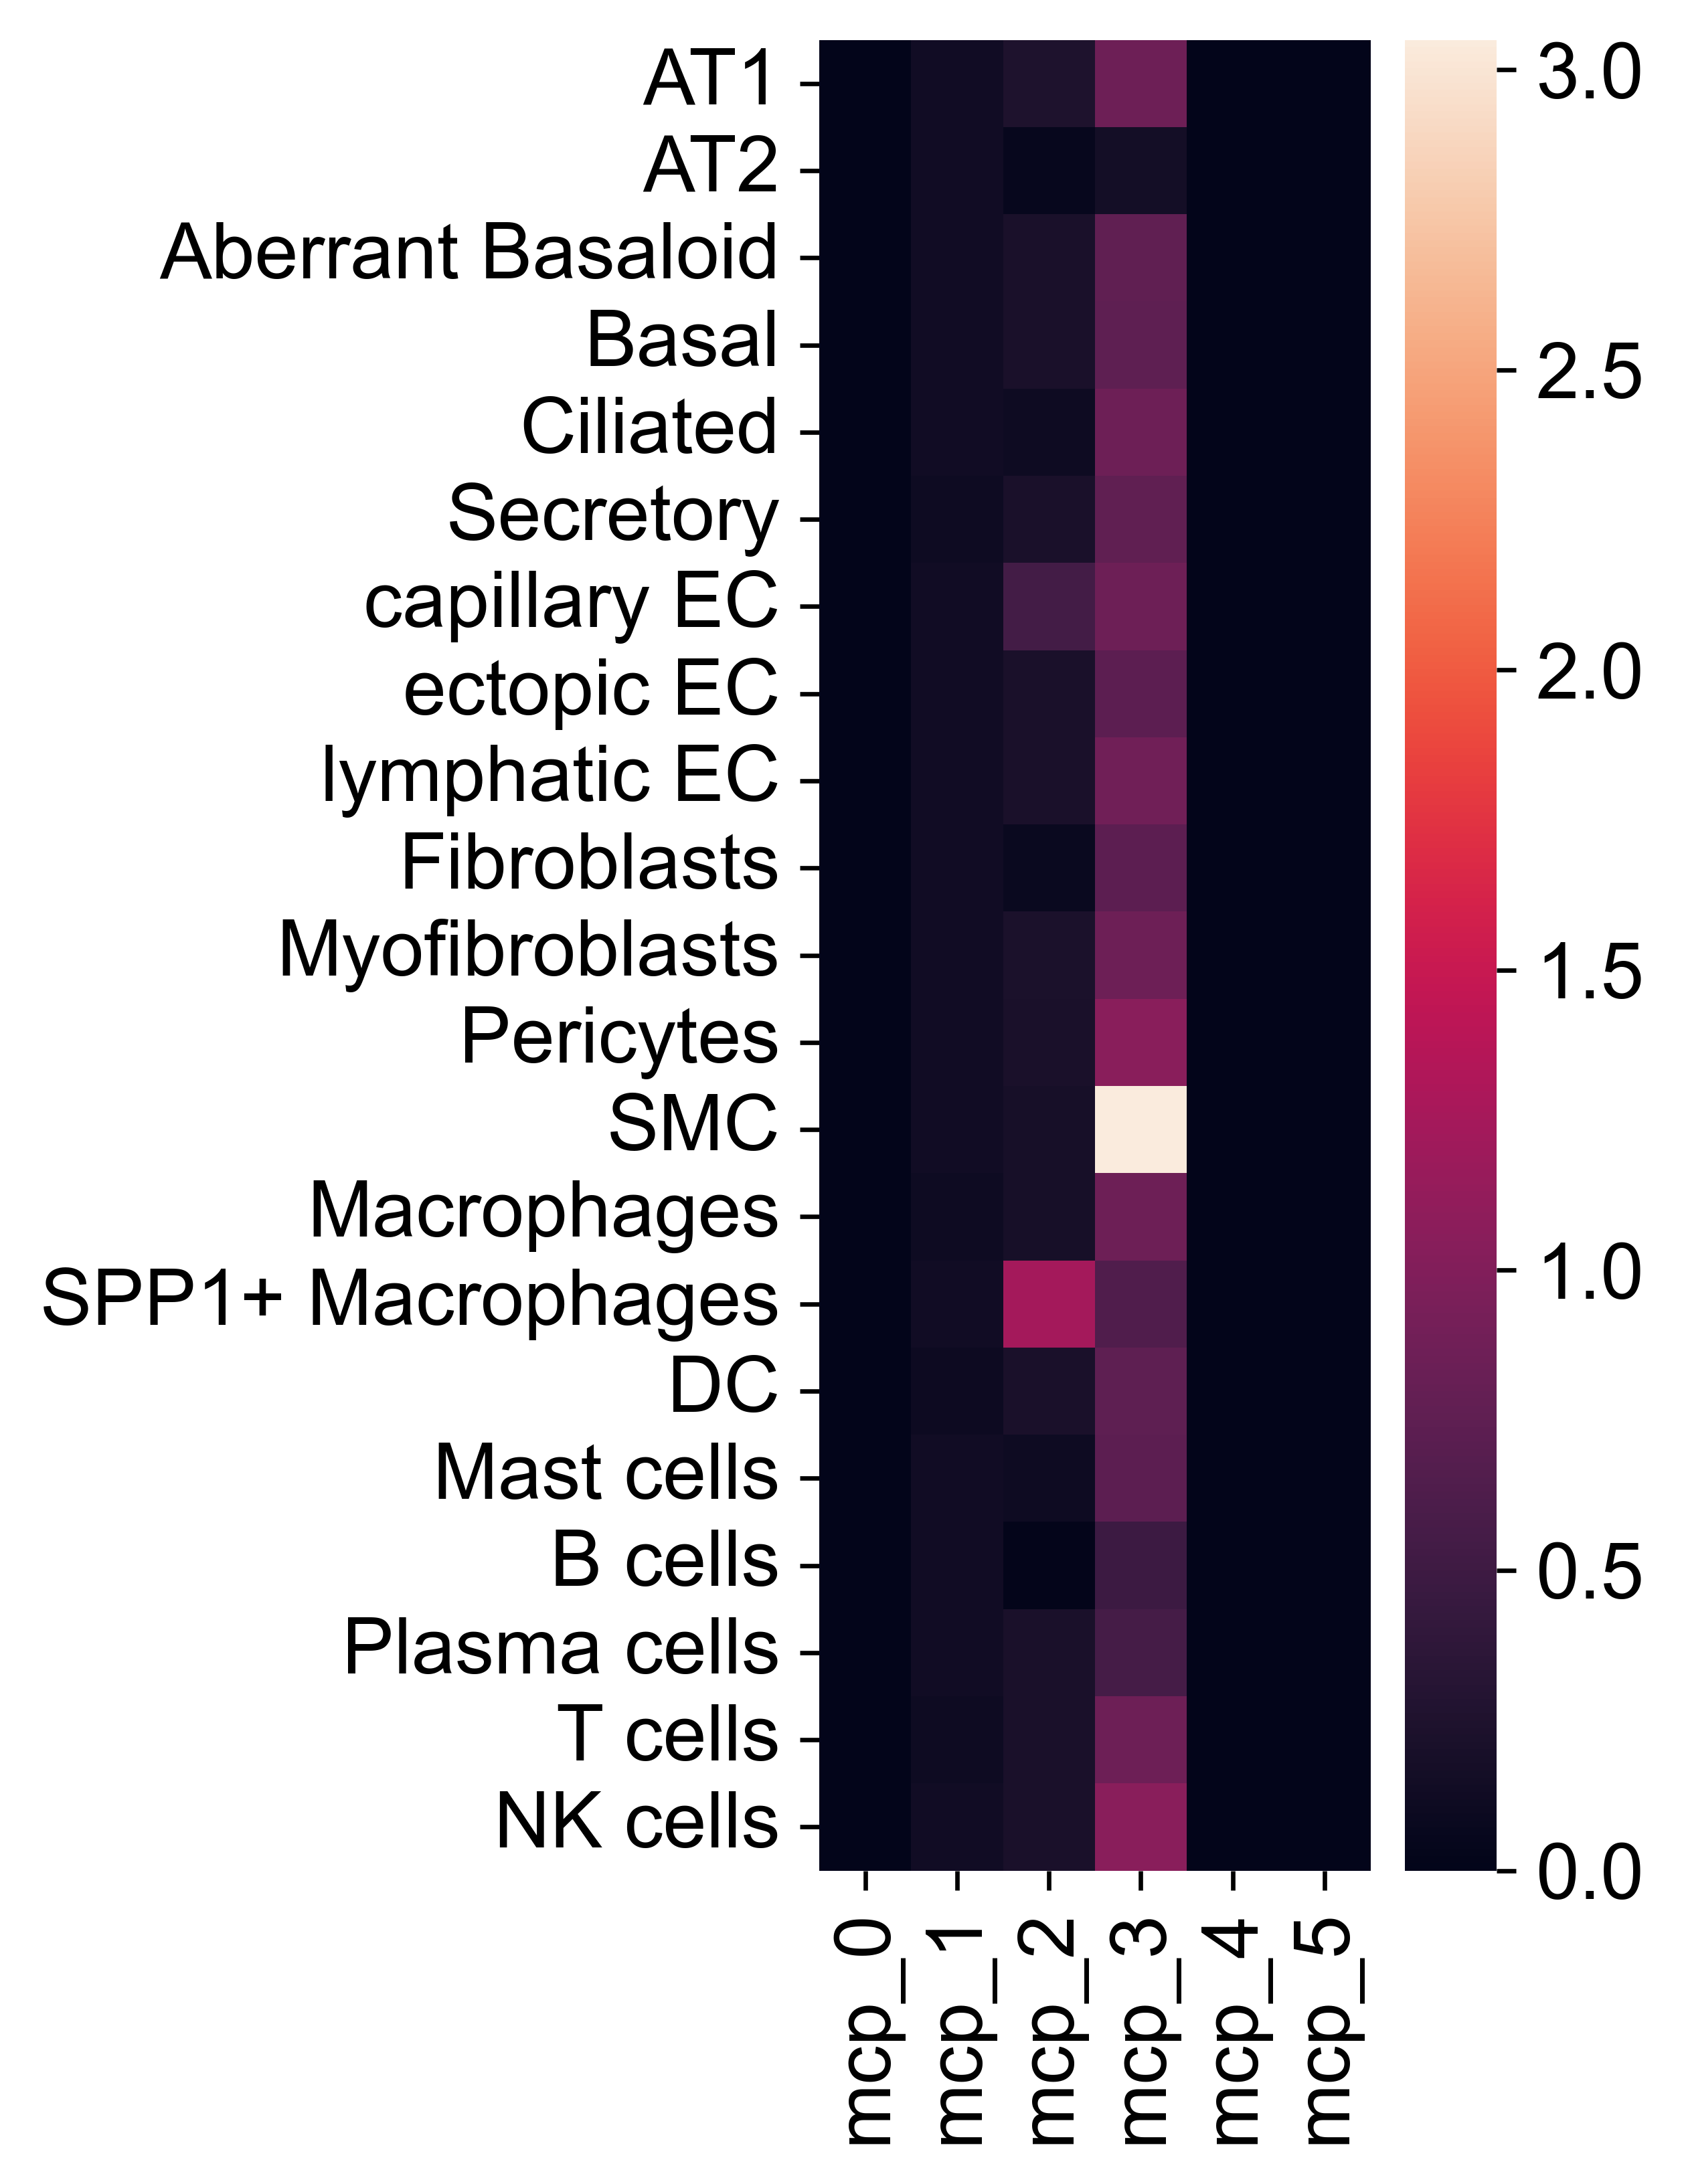

In [118]:
plot_heatmap(fc_associations_df)

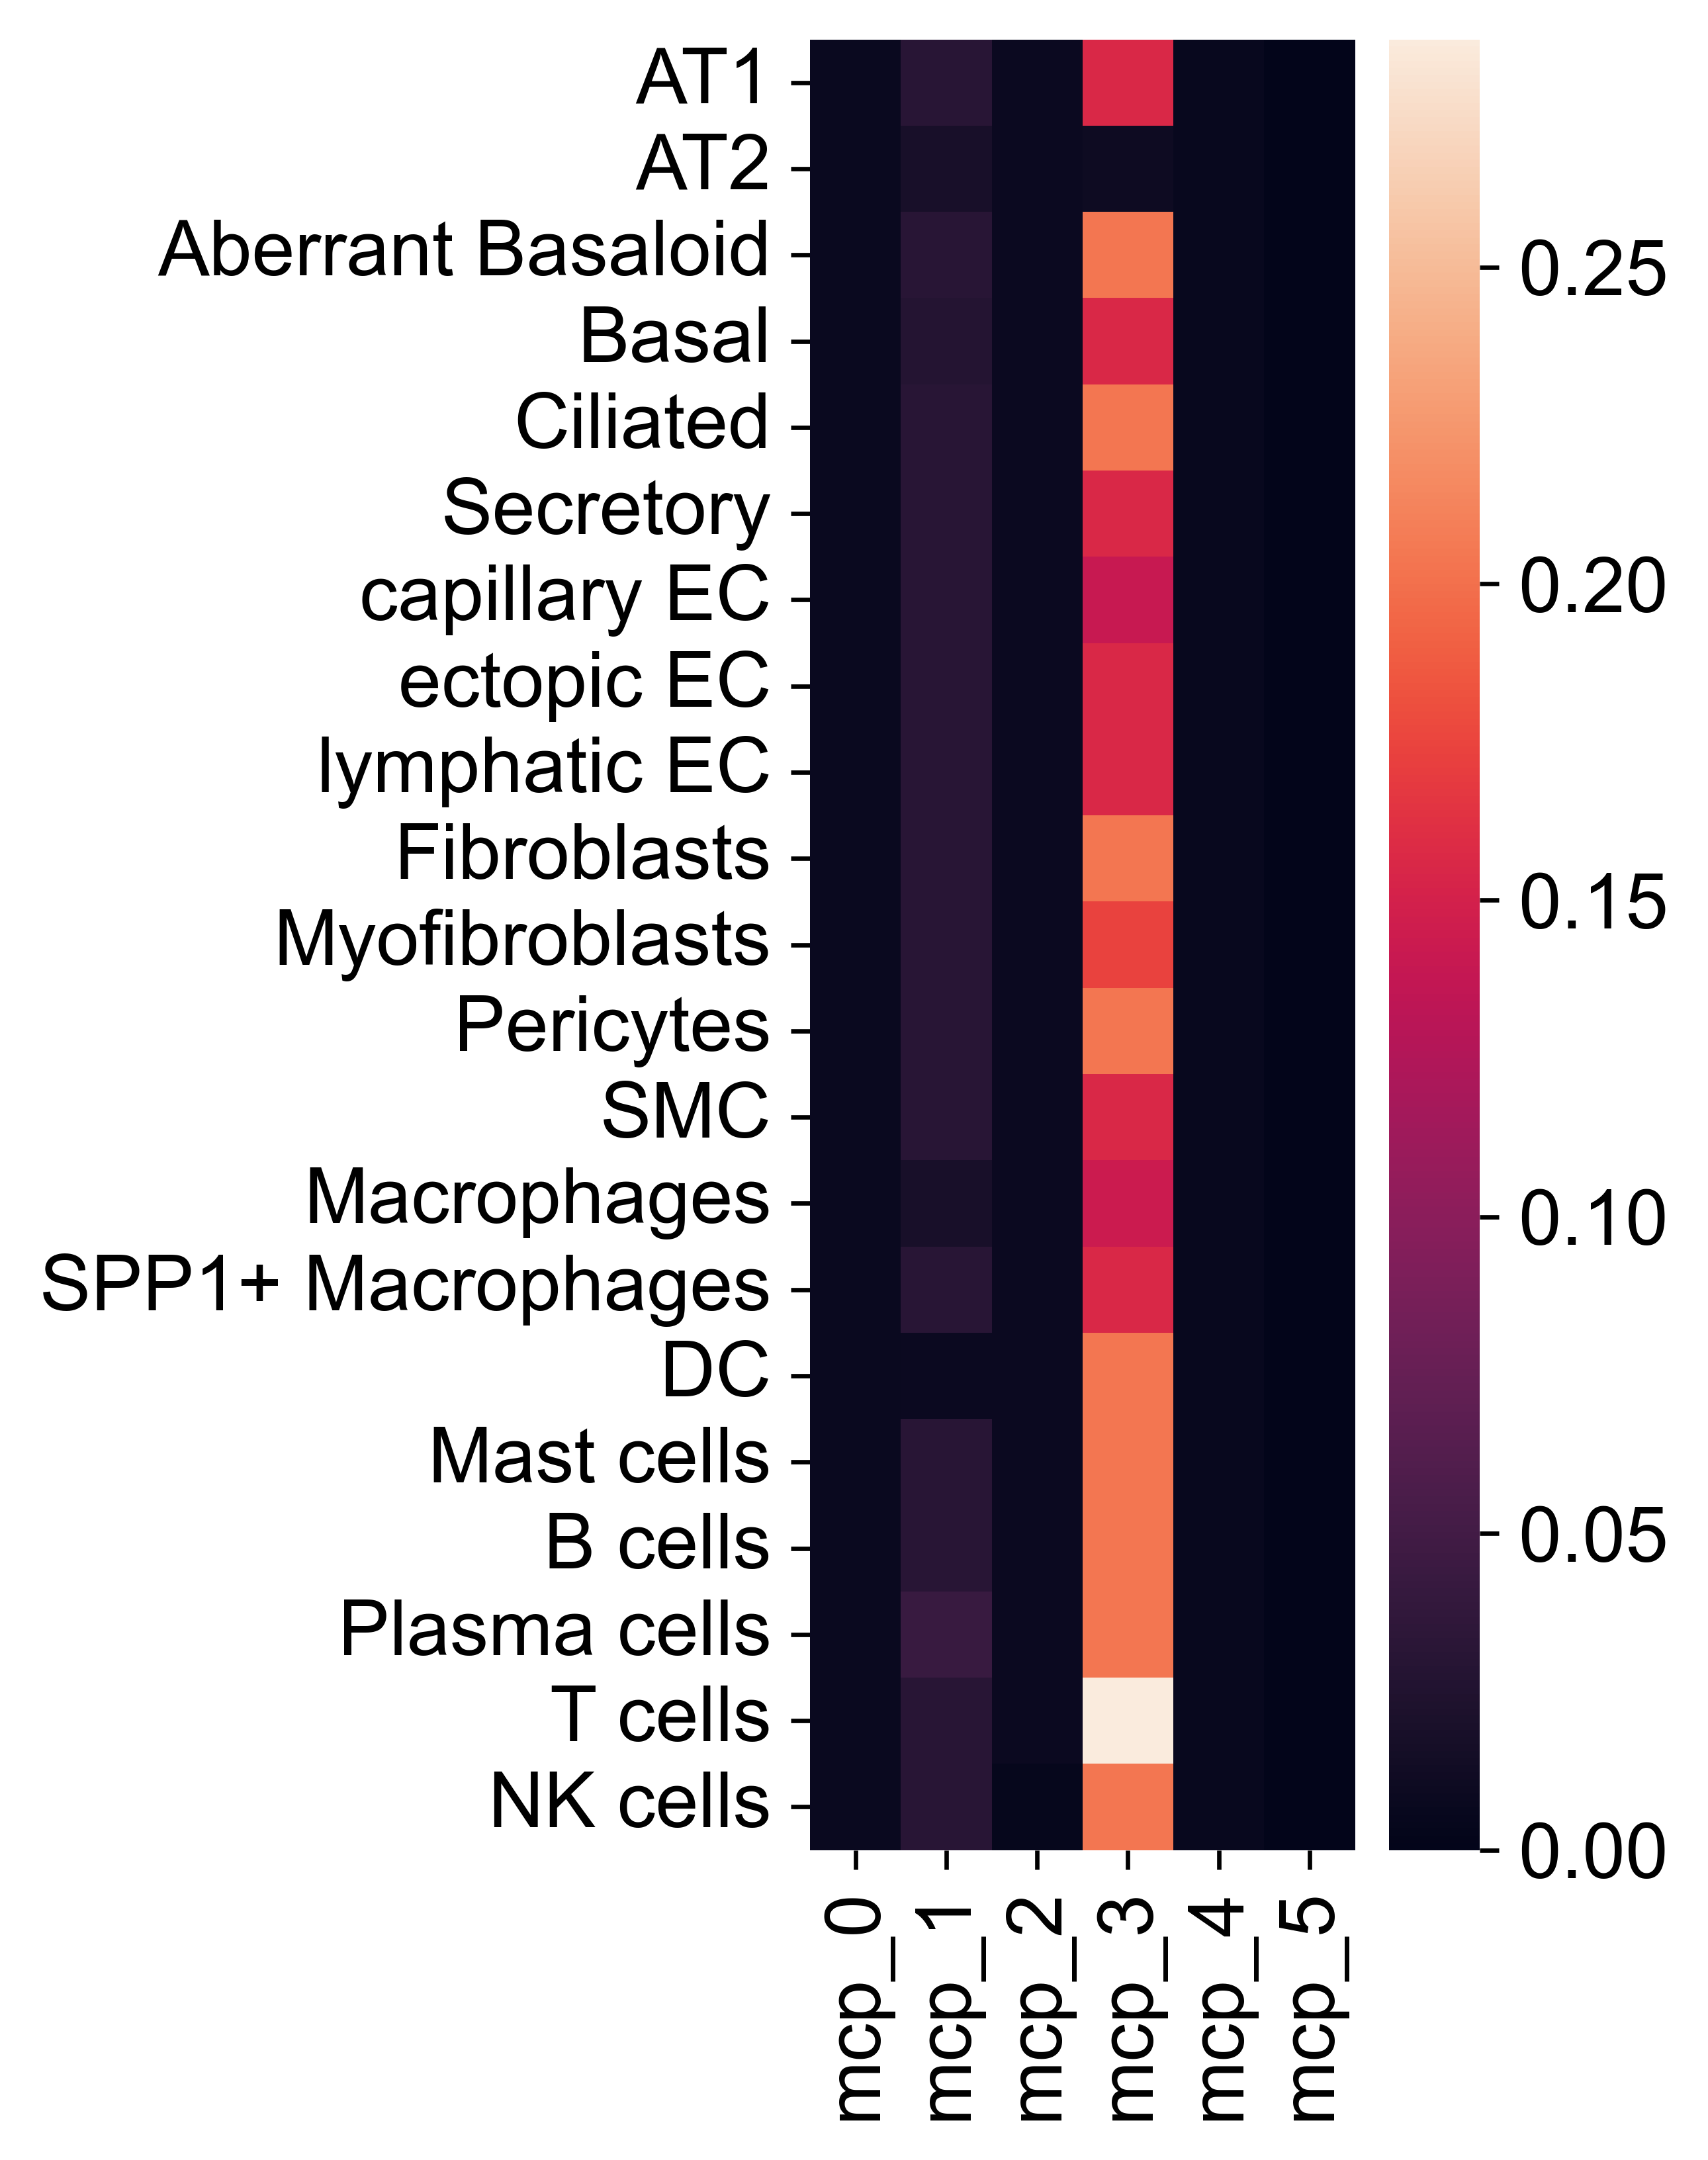

In [105]:
plot_heatmap(cmp4_associations_df)

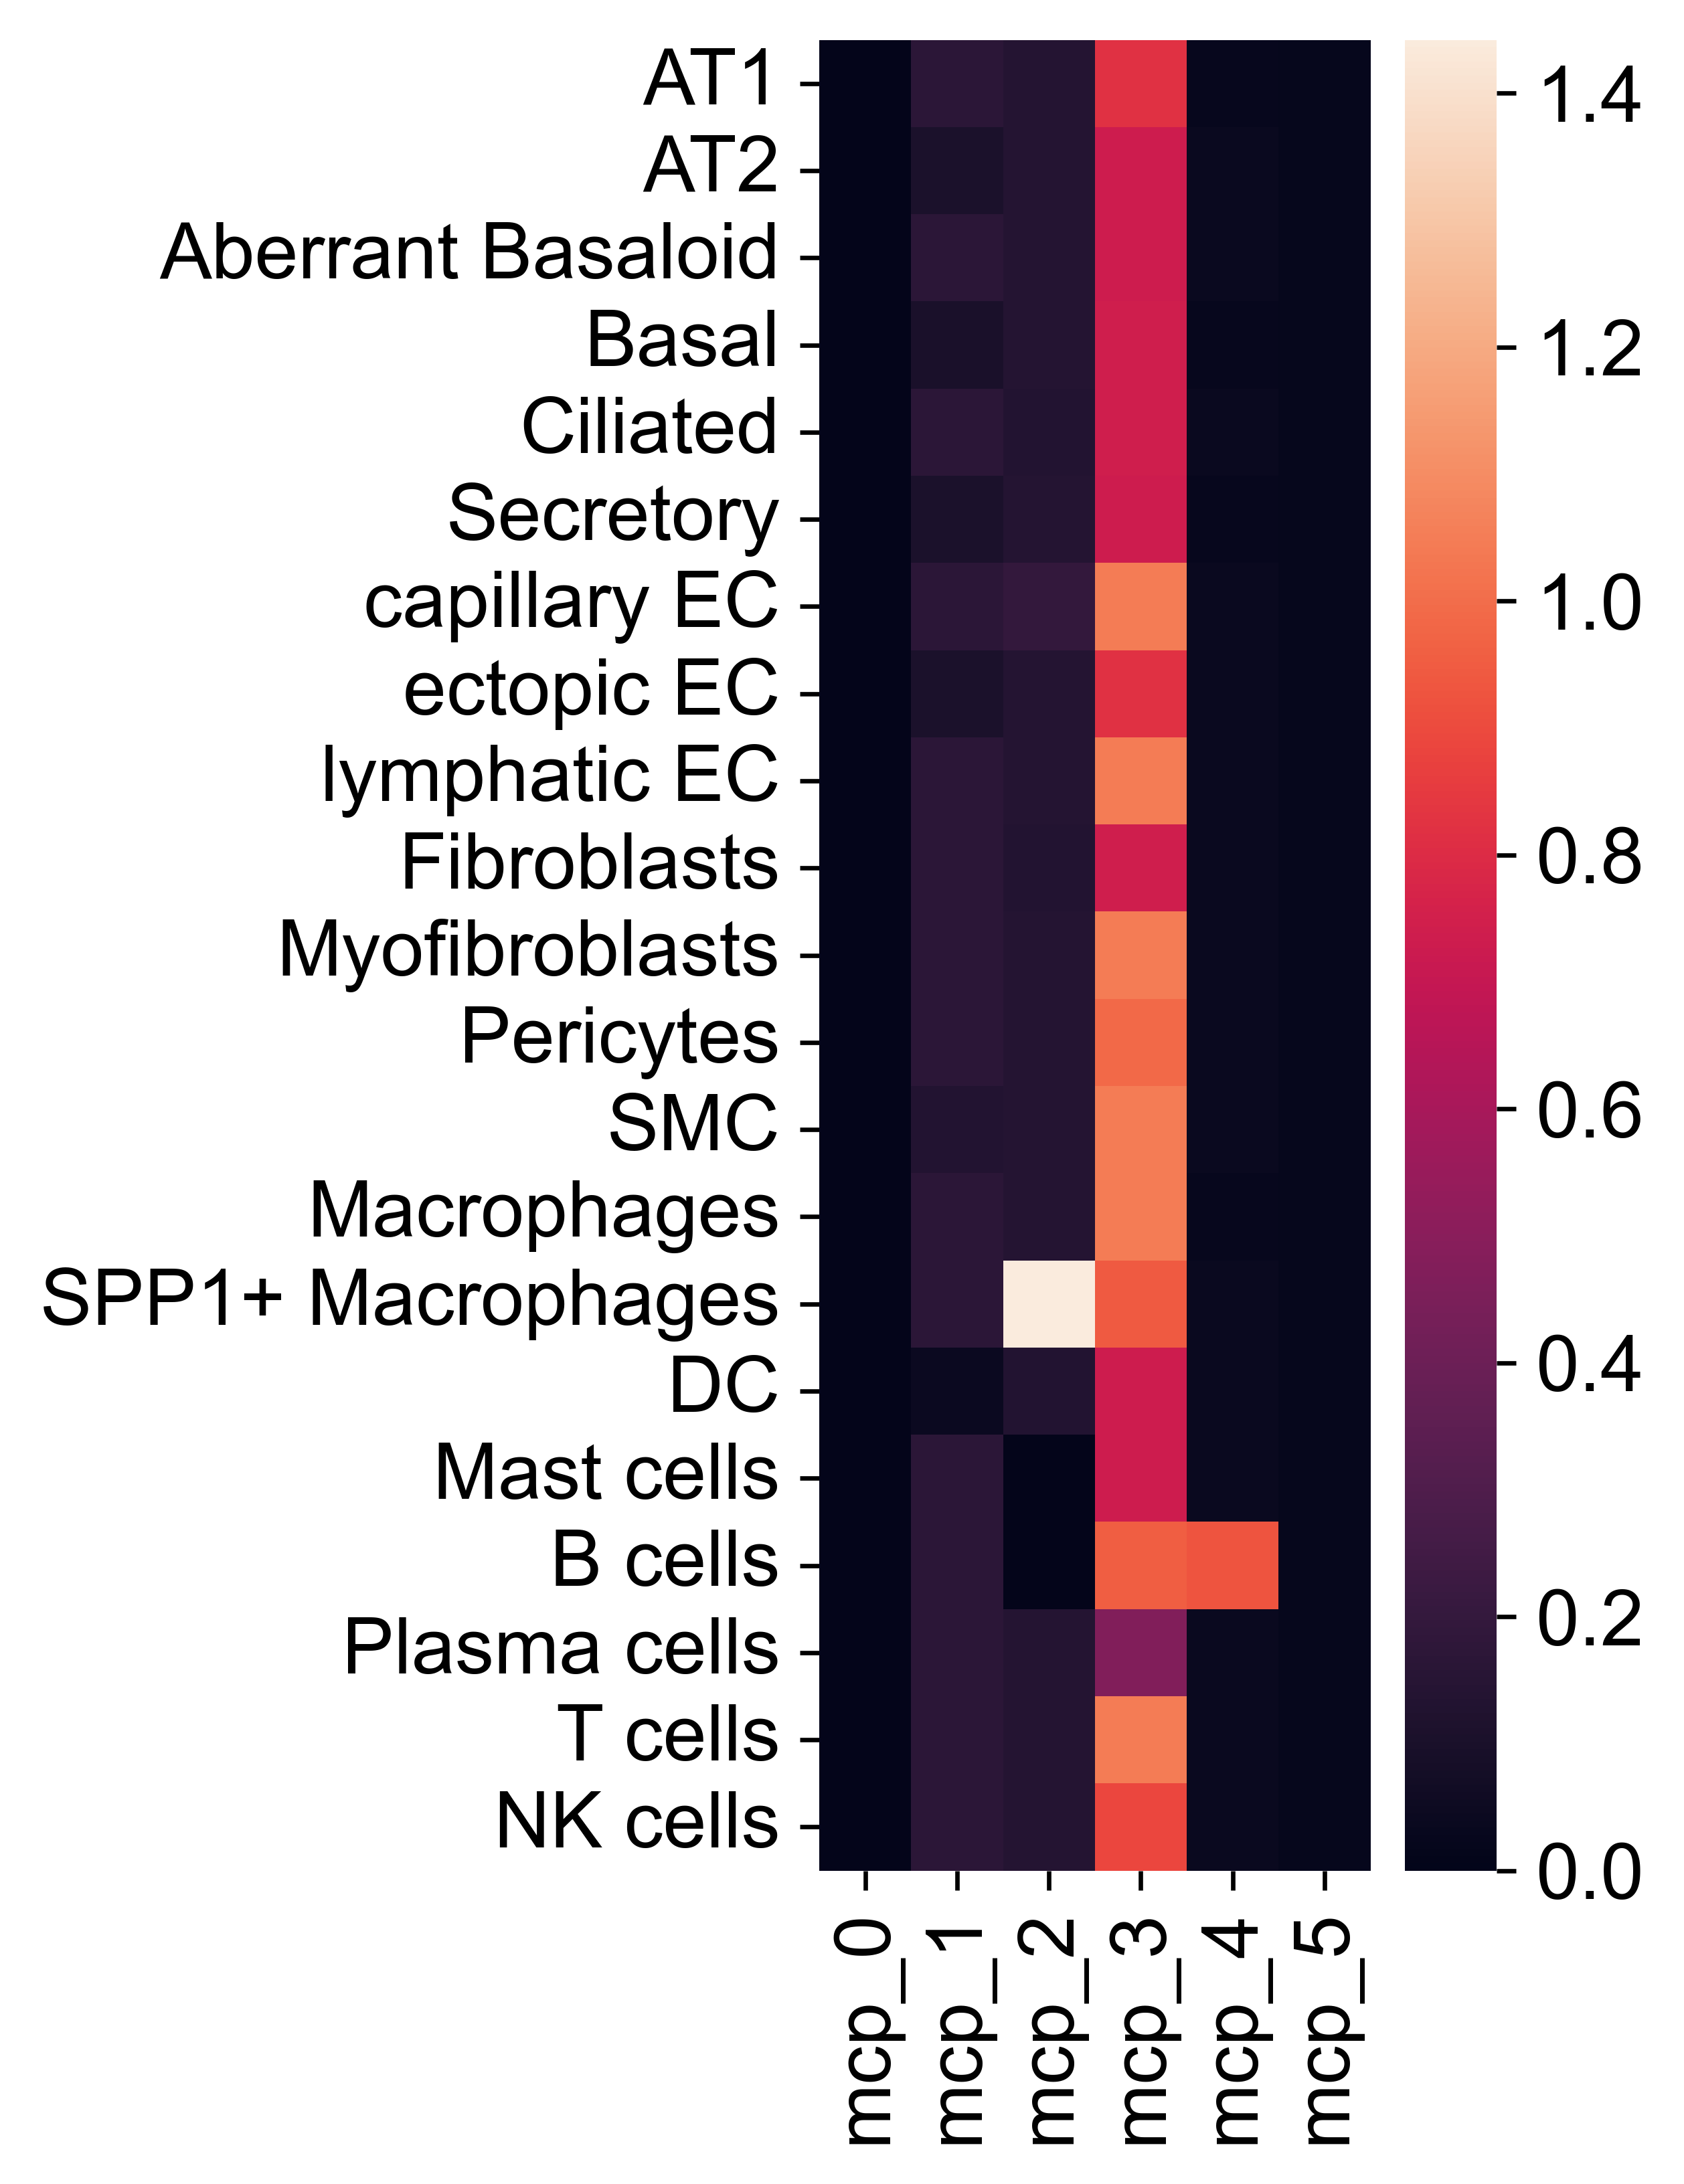

In [106]:
plot_heatmap(nintedanib_associations_df)

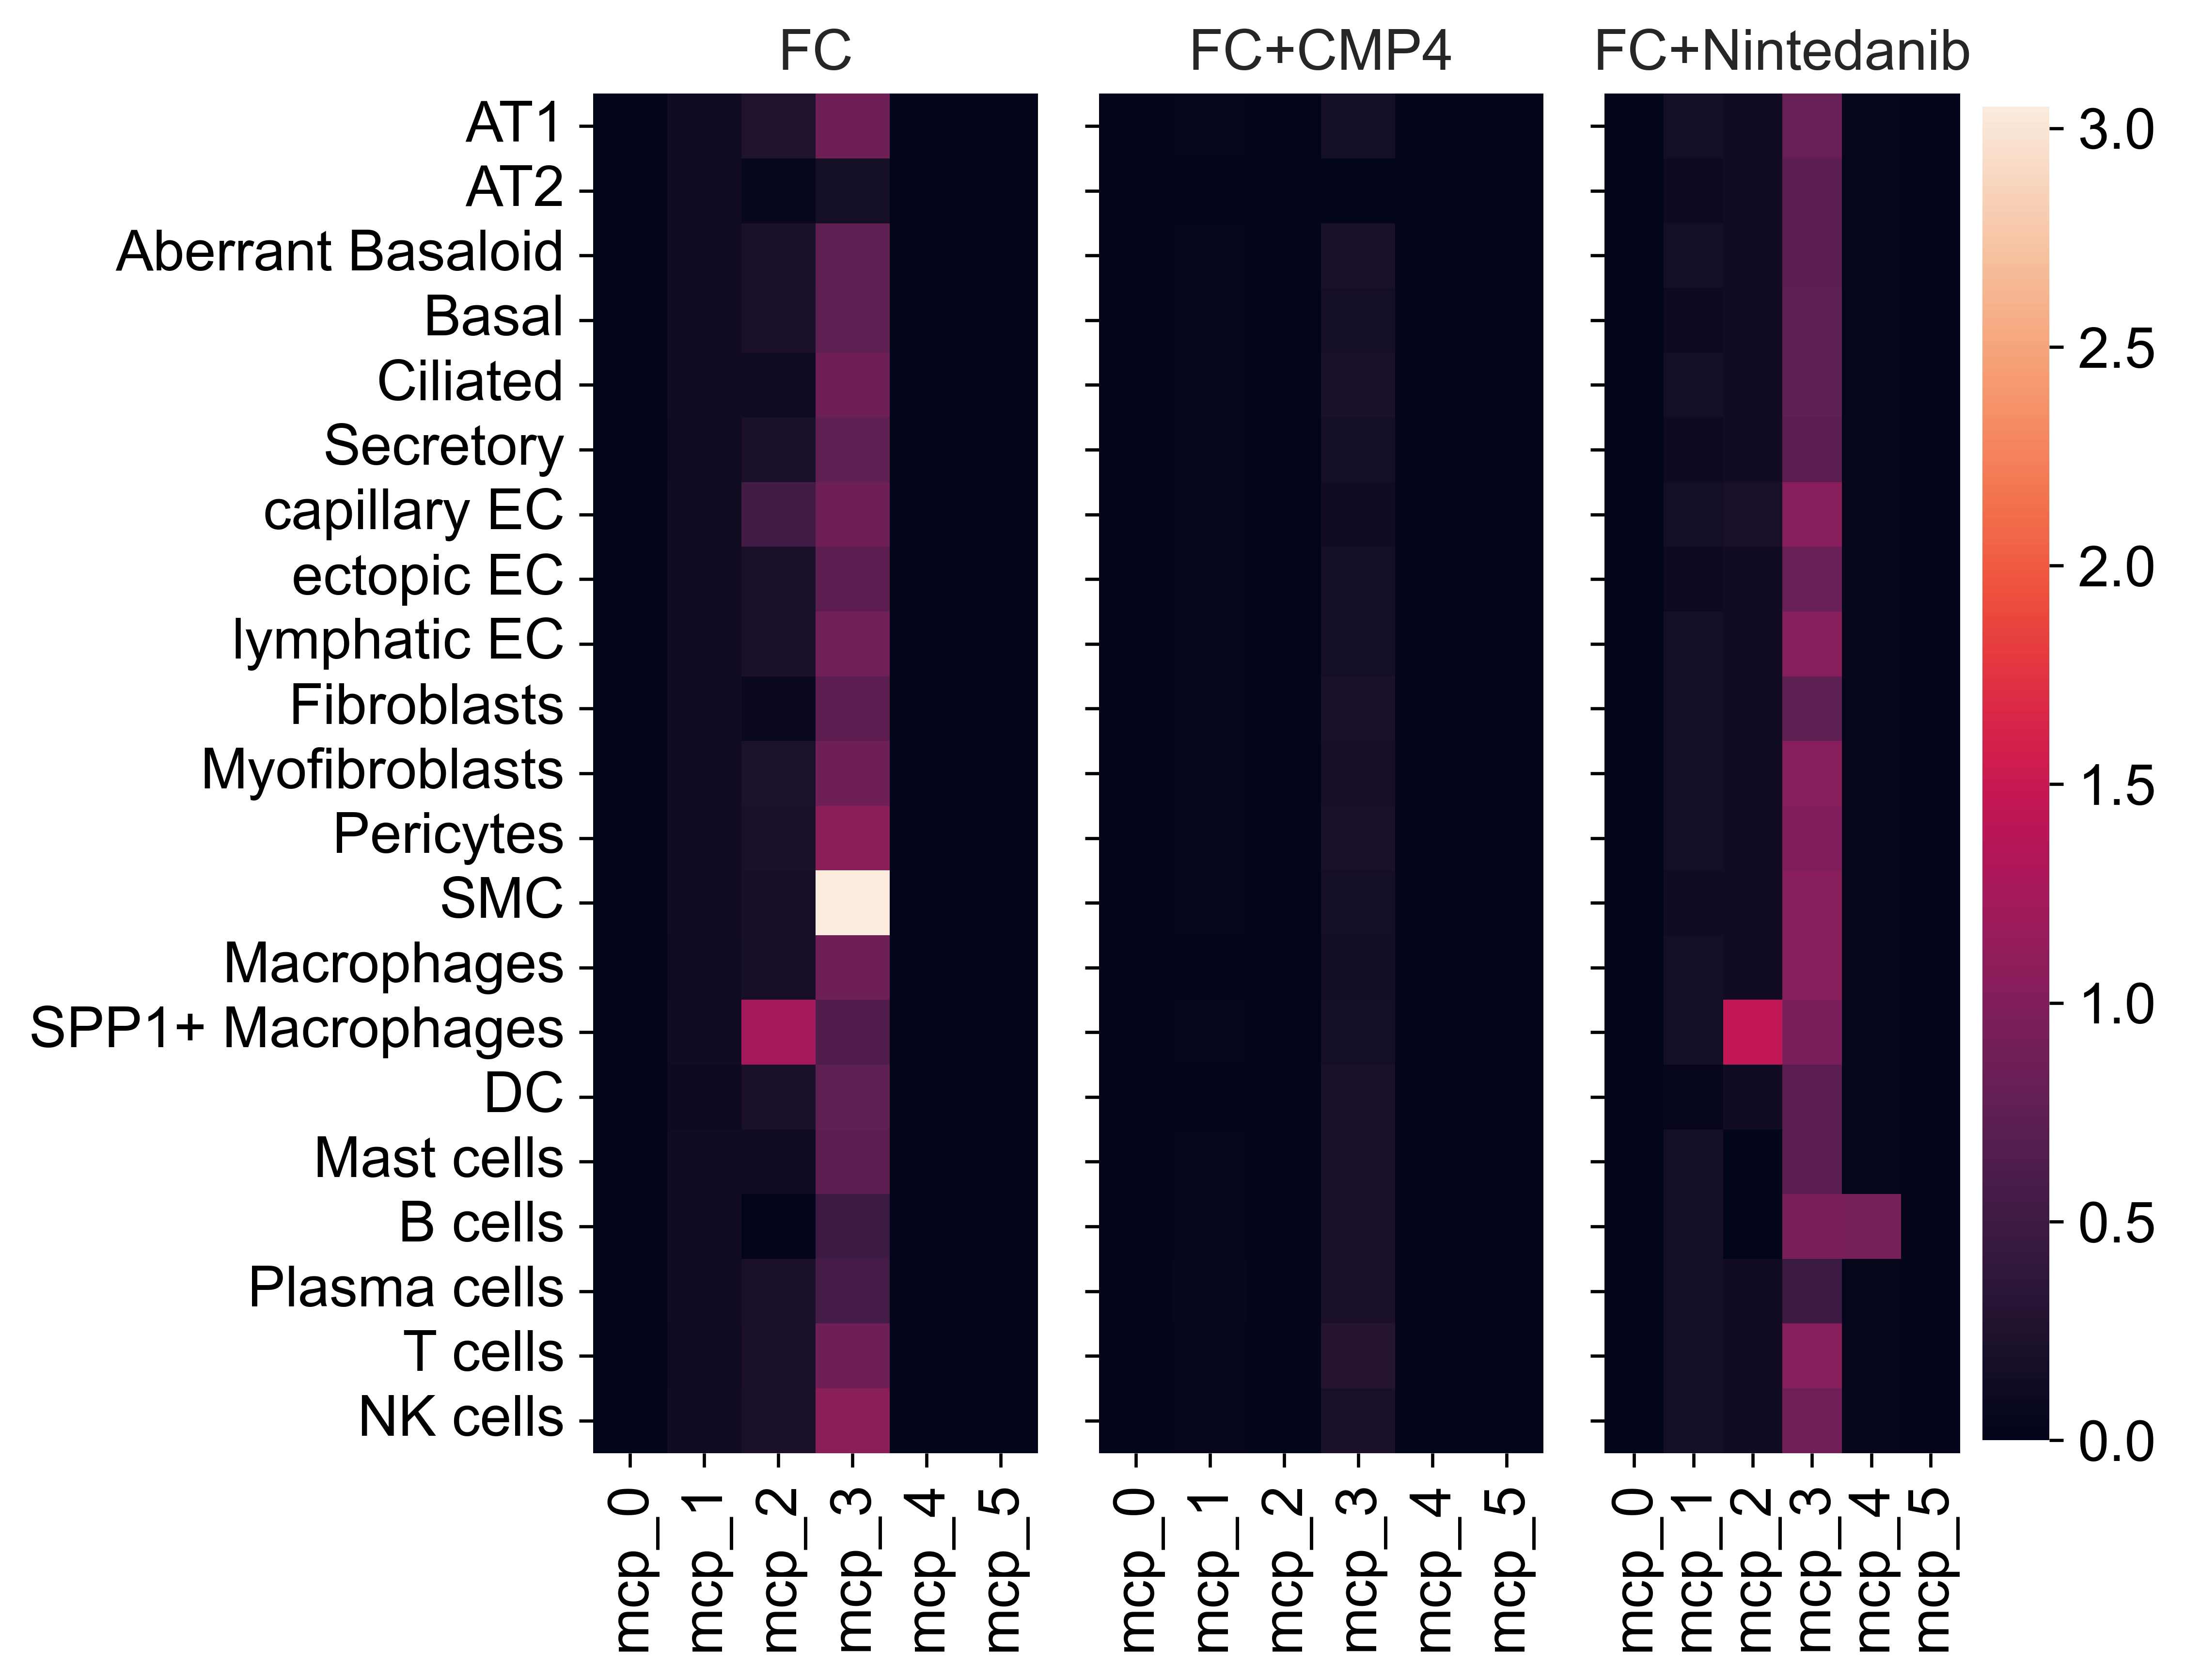

In [124]:
# Plot all three in one plot with subplots, take the global max as vmax
global_max = (-1 * np.log10(fc_associations_df[f"mcp_3"])).max()

plt.subplots(1, 3, figsize=(7.7, 6), sharey=True)
plt.subplot(1, 3, 1)
plot_heatmap(fc_associations_df, vmax=global_max, create_fig=False, cbar=False)
plt.title("FC")

plt.subplot(1, 3, 2)
plot_heatmap(cmp4_associations_df, vmax=global_max, create_fig=False, cbar=False)
plt.title("FC+CMP4")

plt.subplot(1, 3, 3)
plot_heatmap(nintedanib_associations_df, vmax=global_max, create_fig=False)
plt.title("FC+Nintedanib")

plt.tight_layout()
plt.show()

In [38]:
extrema_genes = pd.read_pickle("dialogue_output/extrema_genes.pickle")

In [39]:
extrema_genes["mcp_3"]["T cells"]

names     scores  logfoldchanges          pvals      pvals_adj
0        KLHL24   7.595687        1.968745   6.419292e-14   1.038514e-11
1        TYROBP   6.646291        3.343423   5.202174e-11   5.876180e-09
2           FTL   6.642228       27.542978   5.862165e-11   6.580553e-09
3      MTRNR2L8   6.400302        1.357933   2.148279e-10   2.181227e-08
4          CD63   5.913690        2.697671   4.572614e-09   3.879853e-07
...         ...        ...             ...            ...            ...
18068      CD52 -28.580585       -3.135892  4.022880e-144  1.454110e-140
18069      CD3D -31.231567       -3.146558  2.540041e-165  1.147654e-161
18070       JUN -33.102619       -4.577327  1.131511e-168  6.816600e-165
18071    S100A4 -37.073364       -4.111811  1.497389e-214  2.706231e-210
18072       VIM -39.377888       -6.323392  8.588556e-201  7.761049e-197

[18073 rows x 5 columns]

# Look at genes affected by each MCP

In [40]:
mcp_genes = {}
for mcp_nr in range(6):
    mcp_genes[f"mcp_{mcp_nr}"] = []
    for cell_type in extrema_genes[f"mcp_{mcp_nr}"].keys():
        df = extrema_genes[f"mcp_{mcp_nr}"][cell_type]
        df = df[df["pvals_adj"] < 0.0001]
        mcp_genes[f"mcp_{mcp_nr}"].extend(df["names"].values)
    print(f"mcp_{mcp_nr}: {len(set(mcp_genes[f'mcp_{mcp_nr}']))} genes")

mcp_0: 9675 genes
mcp_1: 8022 genes
mcp_2: 9055 genes
mcp_3: 6591 genes
mcp_4: 9044 genes
mcp_5: 7603 genes


In [74]:
gp = GProfiler(return_dataframe=True)

gsea_results = {}
for mcp_nr in range(6):
    results = gp.profile(organism='hsapiens',
                query=mcp_genes[f"mcp_{mcp_nr}"])
    gsea_results[f"mcp_{mcp_nr}"] = results

In [76]:
gsea_results["mcp_0"]

source                 native  \
0     GO:MF             GO:0005515   
1     GO:CC             GO:0005737   
2     GO:CC             GO:0005829   
3       HPA            HPA:0300000   
4        TF            TF:M09894_1   
...     ...                    ...   
5480     HP             HP:0002094   
5481  GO:BP             GO:0050764   
5482  GO:MF             GO:0004715   
5483   REAC      REAC:R-HSA-111447   
5484  MIRNA  MIRNA:hsa-miR-3680-3p   

                                                   name        p_value  \
0                                       protein binding  4.940656e-324   
1                                             cytoplasm  4.940656e-324   
2                                               cytosol  3.462492e-312   
3                                                  lung  1.541228e-289   
4     Factor: E2F-4; motif: SNGGGCGGGAANN; match cla...  1.581926e-289   
...                                                 ...            ...   
5480                                            Dyspnea   4.924261e-02   
5481                         regulation of phagocytosis   4.977168e-02   
5482  non-membrane spanning protein tyrosine kinase ...   4.992886e-02   
5483  Activation of BAD and translocation to mitocho...   4.993108e-02   
5484                                    hsa-miR-3680-3p   4.994811e-02   

      significant                                        description  \
0            True          "Binding to a protein." [GOC:go_curators]   
1            True  "The contents of a cell excluding the plasma m...   
2            True  "The part of the cytoplasm that does not conta...   
3            True                                               lung   
4            True  Factor: E2F-4; motif: SNGGGCGGGAANN; match cla...   
...           ...                                                ...   
5480         True  Difficult or labored breathing. Dyspnea is a s...   
5481         True  "Any process that modulates the frequency, rat...   
5482         True  "Catalysis of the reaction: ATP + protein L-ty...   
5483         True  Activation of BAD and translocation to mitocho...   
5484         True                                    hsa-miR-3680-3p   

      term_size  query_size  intersection_size  effective_domain_size  \
0         14838        9163               8075                  20212   
1         12345        9163               6912                  22097   
2          5487        9163               3480                  22097   
3          7379        6379               5160                  11019   
4         14345        9456               7915                  20045   
...         ...         ...                ...                    ...   
5480        482        2774                311                   4958   
5481         97        8810                 61                  21031   
5482         45        9163                 33                  20212   
5483         15        5918                 15                  10842   
5484        173        8468                124                  14819   

      precision    recall    query                   parents  
0      0.881262  0.544211  query_1              [GO:0005488]  
1      0.754338  0.559903  query_1  [GO:0005622, GO:0110165]  
2      0.379788  0.634226  query_1  [GO:0005737, GO:0110165]  
3      0.808904  0.699282  query_1             [HPA:0000000]  
4      0.837035  0.551760  query_1               [TF:M09894]  
...         ...       ...      ...                       ...  
5480   0.112112  0.645228  query_1              [HP:0002793]  
5481   0.006924  0.628866  query_1  [GO:0006909, GO:0030100]  
5482   0.003601  0.733333  query_1              [GO:0004713]  
5483   0.002535  1.000000  query_1       [REAC:R-HSA-114452]  
5484   0.014643  0.716763  query_1            [MIRNA:000000]  

[5485 rows x 14 columns]

In [77]:
gsea_results["mcp_0"][gsea_results["mcp_0"]["source"] == "REAC"]

source              native  \
1192   REAC  REAC:R-HSA-2262752   
1194   REAC  REAC:R-HSA-8953897   
1359   REAC    REAC:R-HSA-72766   
1570   REAC  REAC:R-HSA-8953854   
1571   REAC    REAC:R-HSA-72737   
...     ...                 ...   
5448   REAC   REAC:R-HSA-350562   
5473   REAC  REAC:R-HSA-6782210   
5476   REAC   REAC:R-HSA-917937   
5478   REAC  REAC:R-HSA-5610780   
5483   REAC   REAC:R-HSA-111447   

                                                   name       p_value  \
1192                       Cellular responses to stress  1.902308e-33   
1194                      Cellular responses to stimuli  2.014762e-33   
1359                                        Translation  9.656631e-28   
1570                                  Metabolism of RNA  5.889828e-22   
1571               Cap-dependent Translation Initiation  6.294487e-22   
...                                                 ...           ...   
5448        Regulation of ornithine decarboxylase (ODC)  4.668941e-02   
5473  Gap-filling DNA repair synthesis and ligation ...  4.874098e-02   
5476                          Iron uptake and transport  4.893555e-02   
5478              Degradation of GLI1 by the proteasome  4.909832e-02   
5483  Activation of BAD and translocation to mitocho...  4.993108e-02   

      significant                                        description  \
1192         True                       Cellular responses to stress   
1194         True                      Cellular responses to stimuli   
1359         True                                        Translation   
1570         True                                  Metabolism of RNA   
1571         True               Cap-dependent Translation Initiation   
...           ...                                                ...   
5448         True        Regulation of ornithine decarboxylase (ODC)   
5473         True  Gap-filling DNA repair synthesis and ligation ...   
5476         True                          Iron uptake and transport   
5478         True              Degradation of GLI1 by the proteasome   
5483         True  Activation of BAD and translocation to mitocho...   

      term_size  query_size  intersection_size  effective_domain_size  \
1192        780        5918                589                  10842   
1194        794        5918                598                  10842   
1359        292        5918                250                  10842   
1570        701        5918                510                  10842   
1571        120        5918                115                  10842   
...         ...         ...                ...                    ...   
5448         51        5918                 41                  10842   
5473         63        5918                 49                  10842   
5476         57        5918                 45                  10842   
5478         60        5918                 47                  10842   
5483         15        5918                 15                  10842   

      precision    recall    query               parents  
1192   0.099527  0.755128  query_1  [REAC:R-HSA-8953897]  
1194   0.101048  0.753149  query_1        [REAC:0000000]  
1359   0.042244  0.856164  query_1   [REAC:R-HSA-392499]  
1570   0.086178  0.727532  query_1        [REAC:0000000]  
1571   0.019432  0.958333  query_1    [REAC:R-HSA-72613]  
...         ...       ...      ...                   ...  
5448   0.006928  0.803922  query_1   [REAC:R-HSA-351202]  
5473   0.008280  0.777778  query_1  [REAC:R-HSA-6781827]  
5476   0.007604  0.789474  query_1   [REAC:R-HSA-382551]  
5478   0.007942  0.783333  query_1  [REAC:R-HSA-5610787]  
5483   0.002535  1.000000  query_1   [REAC:R-HSA-114452]  

[283 rows x 14 columns]

In [78]:
gsea_results["mcp_3"][gsea_results["mcp_3"]["source"] == "REAC"]

source              native  \
940    REAC    REAC:R-HSA-72706   
957    REAC   REAC:R-HSA-156827   
960    REAC   REAC:R-HSA-168256   
1001   REAC    REAC:R-HSA-72737   
1002   REAC    REAC:R-HSA-72613   
...     ...                 ...   
4873   REAC  REAC:R-HSA-2894862   
4874   REAC  REAC:R-HSA-2894858   
4918   REAC   REAC:R-HSA-381119   
4942   REAC  REAC:R-HSA-5675221   
4945   REAC  REAC:R-HSA-5658442   

                                                   name       p_value  \
940   GTP hydrolysis and joining of the 60S ribosoma...  1.625141e-29   
957   L13a-mediated translational silencing of Cerul...  3.850814e-29   
960                                       Immune System  4.510349e-29   
1001               Cap-dependent Translation Initiation  2.001877e-27   
1002                  Eukaryotic Translation Initiation  2.001877e-27   
...                                                 ...           ...   
4873  Constitutive Signaling by NOTCH1 HD+PEST Domai...  4.432896e-02   
4874  Signaling by NOTCH1 HD+PEST Domain Mutants in ...  4.432896e-02   
4918                    Unfolded Protein Response (UPR)  4.721656e-02   
4942                Negative regulation of MAPK pathway  4.977297e-02   
4945                          Regulation of RAS by GAPs  4.989192e-02   

      significant                                        description  \
940          True  GTP hydrolysis and joining of the 60S ribosoma...   
957          True  L13a-mediated translational silencing of Cerul...   
960          True                                      Immune System   
1001         True               Cap-dependent Translation Initiation   
1002         True                  Eukaryotic Translation Initiation   
...           ...                                                ...   
4873         True  Constitutive Signaling by NOTCH1 HD+PEST Domai...   
4874         True  Signaling by NOTCH1 HD+PEST Domain Mutants in ...   
4918         True                    Unfolded Protein Response (UPR)   
4942         True                Negative regulation of MAPK pathway   
4945         True                          Regulation of RAS by GAPs   

      term_size  query_size  intersection_size  effective_domain_size  \
940         113        4273                104                  10842   
957         112        4273                103                  10842   
960        2052        4273               1044                  10842   
1001        120        4273                107                  10842   
1002        120        4273                107                  10842   
...         ...         ...                ...                    ...   
4873         57        4273                 37                  10842   
4874         57        4273                 37                  10842   
4918         91        4273                 54                  10842   
4942         42        4273                 29                  10842   
4945         67        4273                 42                  10842   

      precision    recall    query               parents  
940    0.024339  0.920354  query_1    [REAC:R-HSA-72737]  
957    0.024105  0.919643  query_1    [REAC:R-HSA-72613]  
960    0.244325  0.508772  query_1        [REAC:0000000]  
1001   0.025041  0.891667  query_1    [REAC:R-HSA-72613]  
1002   0.025041  0.891667  query_1    [REAC:R-HSA-72766]  
...         ...       ...      ...                   ...  
4873   0.008659  0.649123  query_1  [REAC:R-HSA-2894858]  
4874   0.008659  0.649123  query_1  [REAC:R-HSA-2644603]  
4918   0.012637  0.593407  query_1  [REAC:R-HSA-2262752]  
4942   0.006787  0.690476  query_1  [REAC:R-HSA-5673001]  
4945   0.009829  0.626866  query_1  [REAC:R-HSA-5673001]  

[239 rows x 14 columns]

# Look at cell circuit

In [128]:
cell_circuit = ["Aberrant Basaloid", "SPP1+ Macrophages", "Myofibroblasts", "Pericytes"]
#TODO: Where VWA1/PLVAP cells???

In [129]:
adata = sc.read_h5ad("/Users/mamba/Downloads/dialogue_lang.h5ad")
adata = adata[adata.obs["cell_type"].isin(cell_circuit)]
adata

View of AnnData object with n_obs × n_vars = 15069 × 17343
    obs: 'condition', 'modality', 'patient', 'treatment', 'identifier', 'n_counts', 'n_genes', 'percent_mito', 'QC_group', 'doublet_scores', 'size_factors', 'leiden_1', 'leiden_2', 'cell_type', 'cell_type_group', 'sample', 'mcp_0', 'mcp_1', 'mcp_2', 'mcp_3', 'mcp_4', 'mcp_5'
    uns: 'cell_type_colors', 'sample_colors', 'treatment_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'counts', 'unsouped_counts'

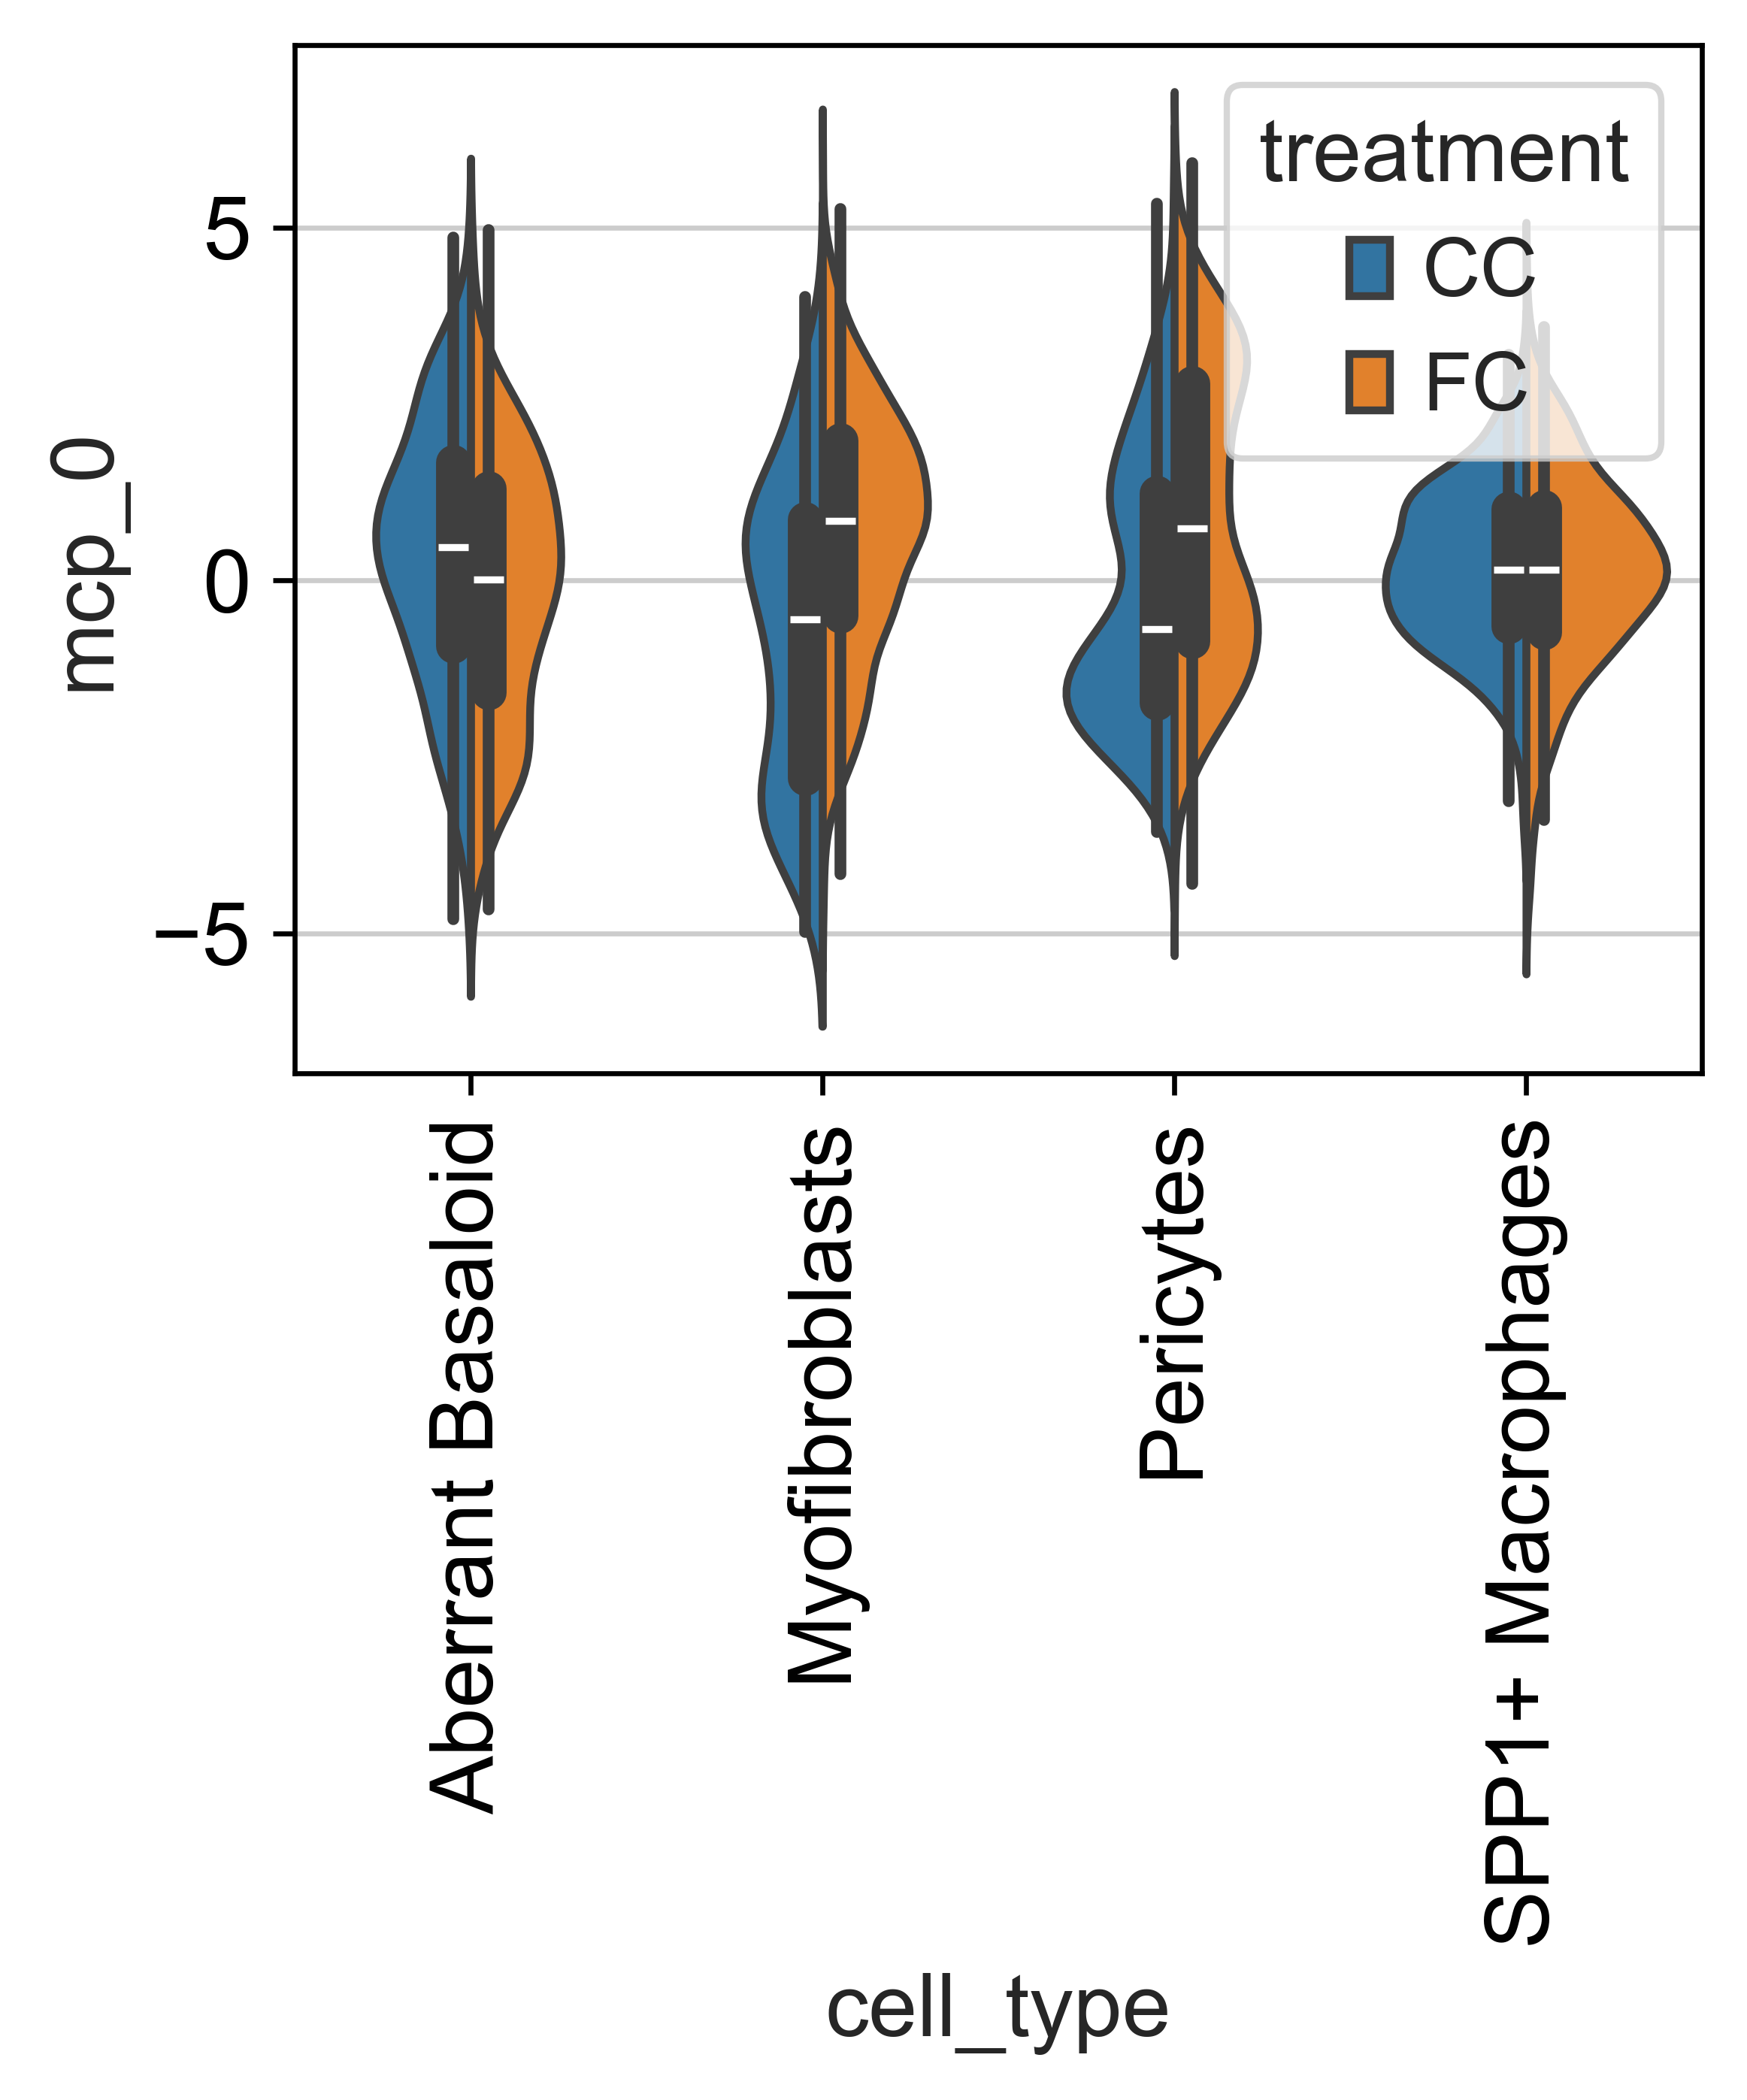

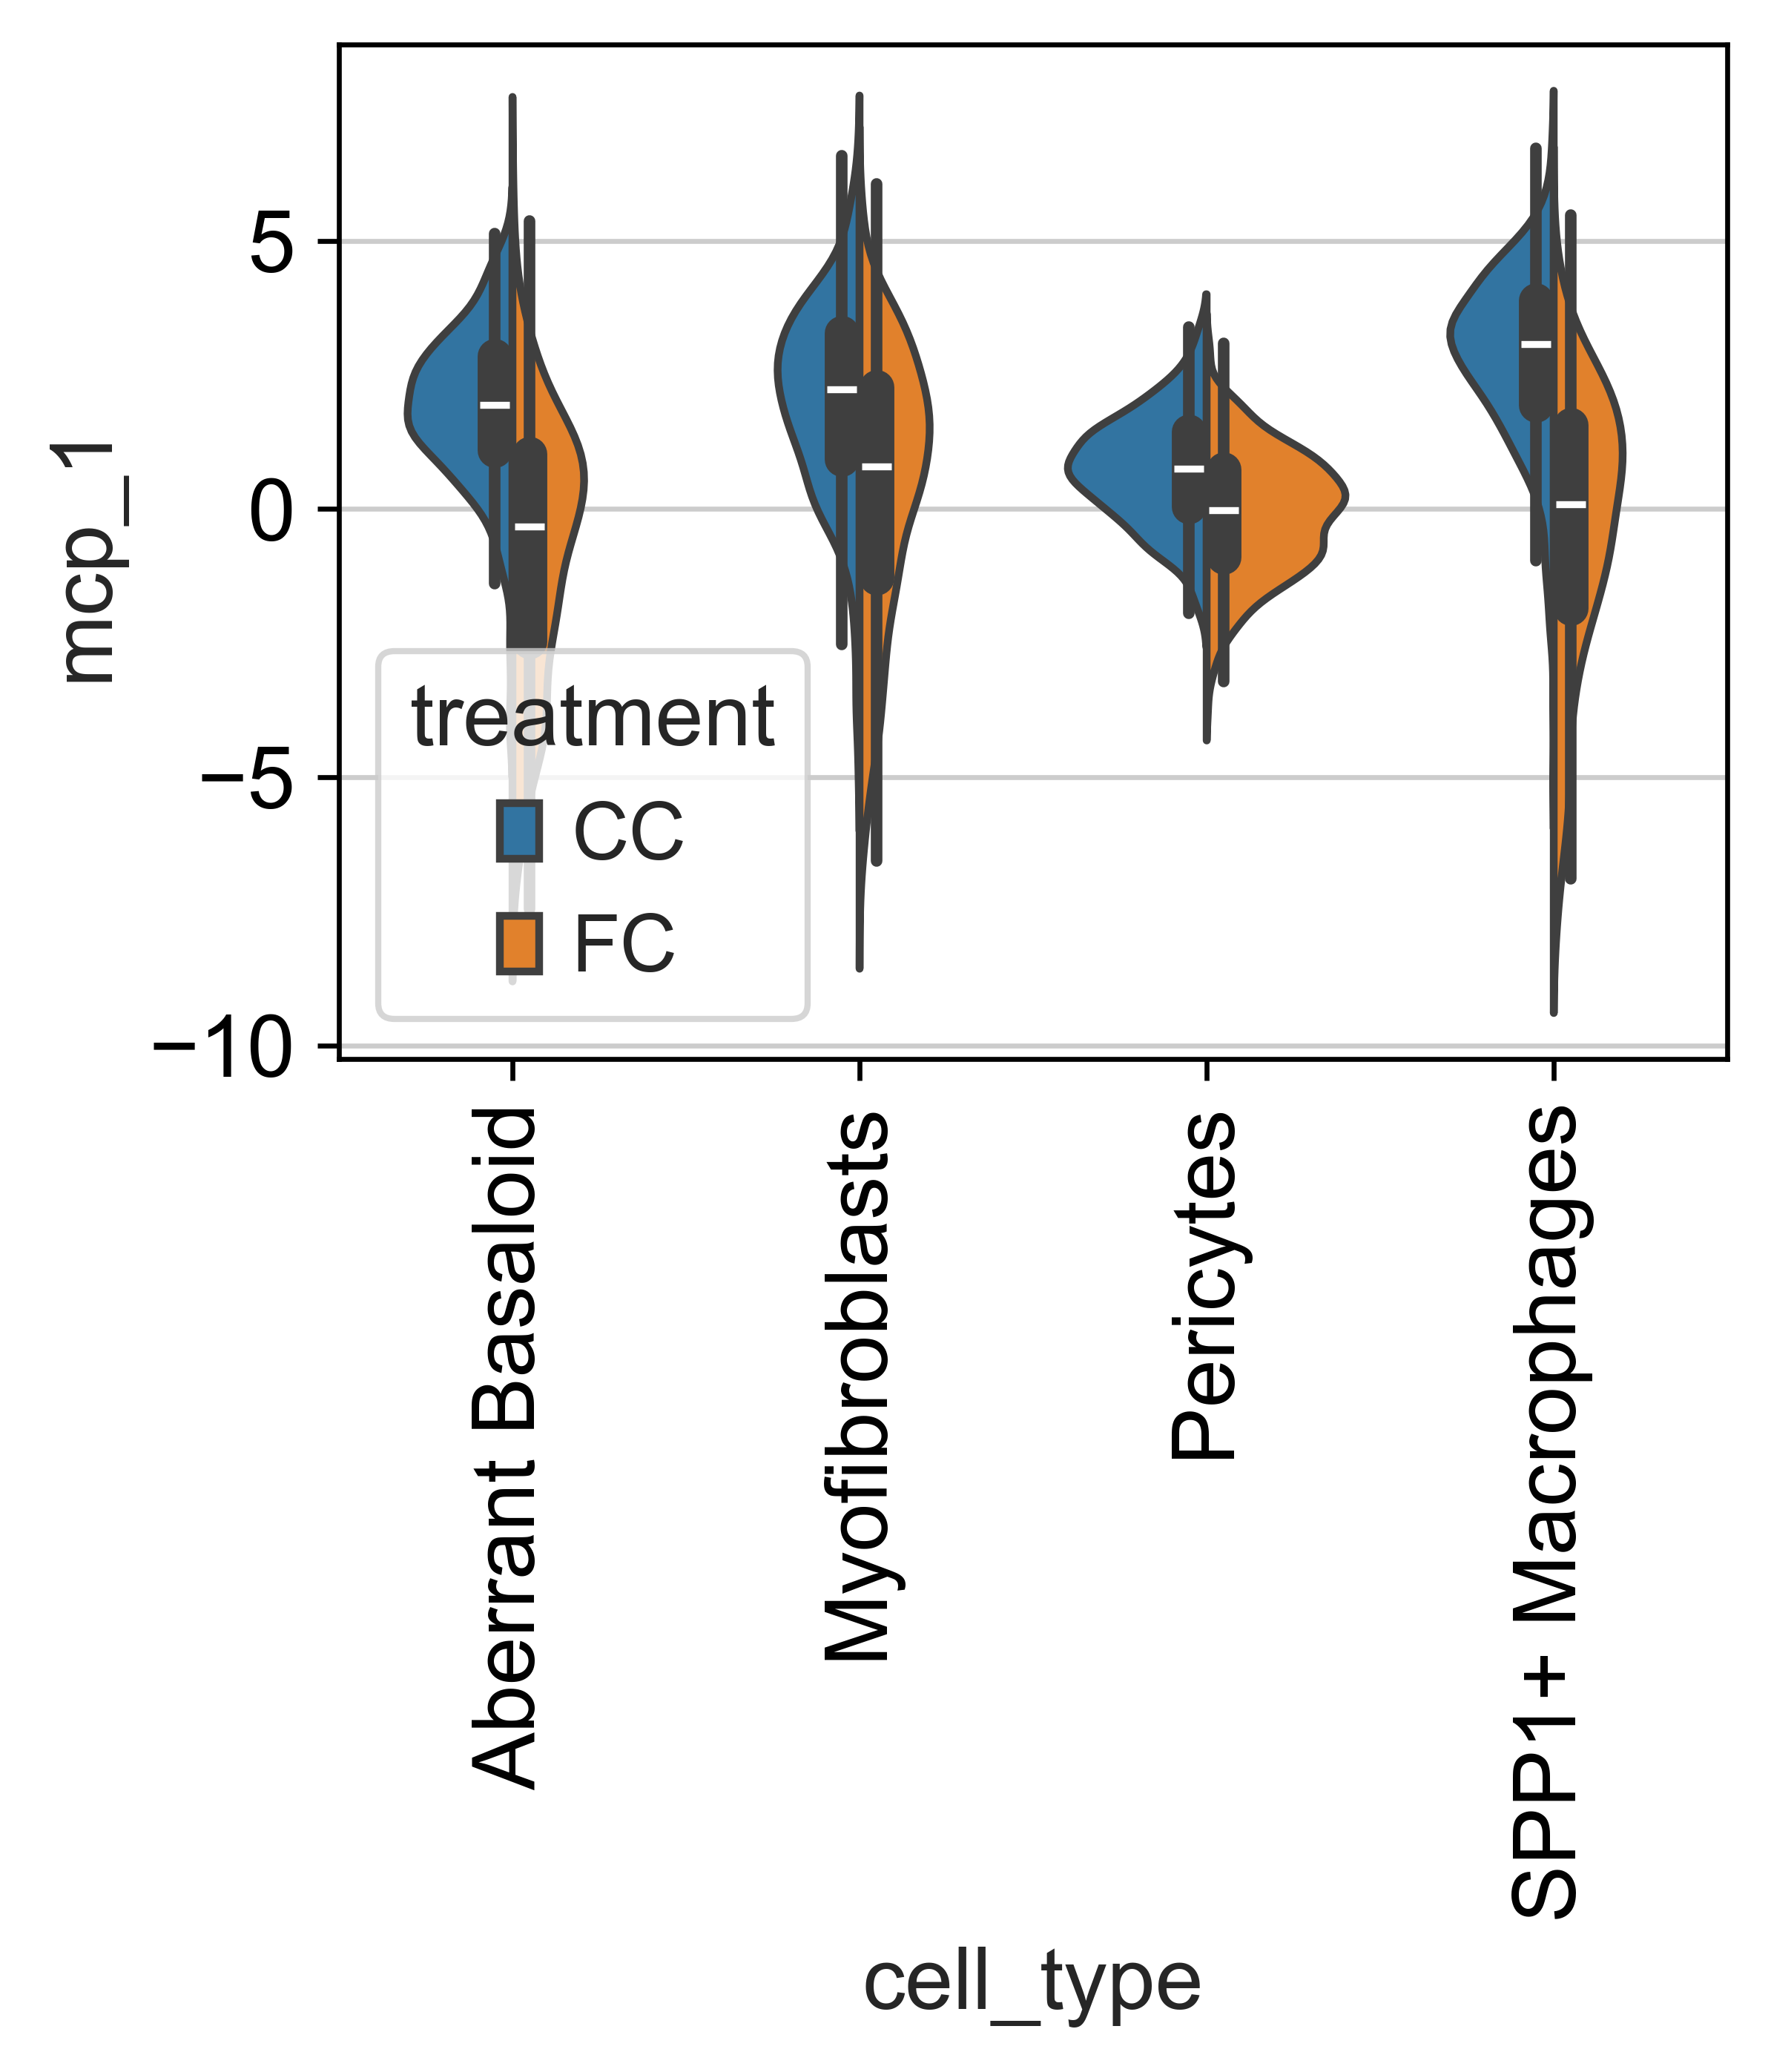

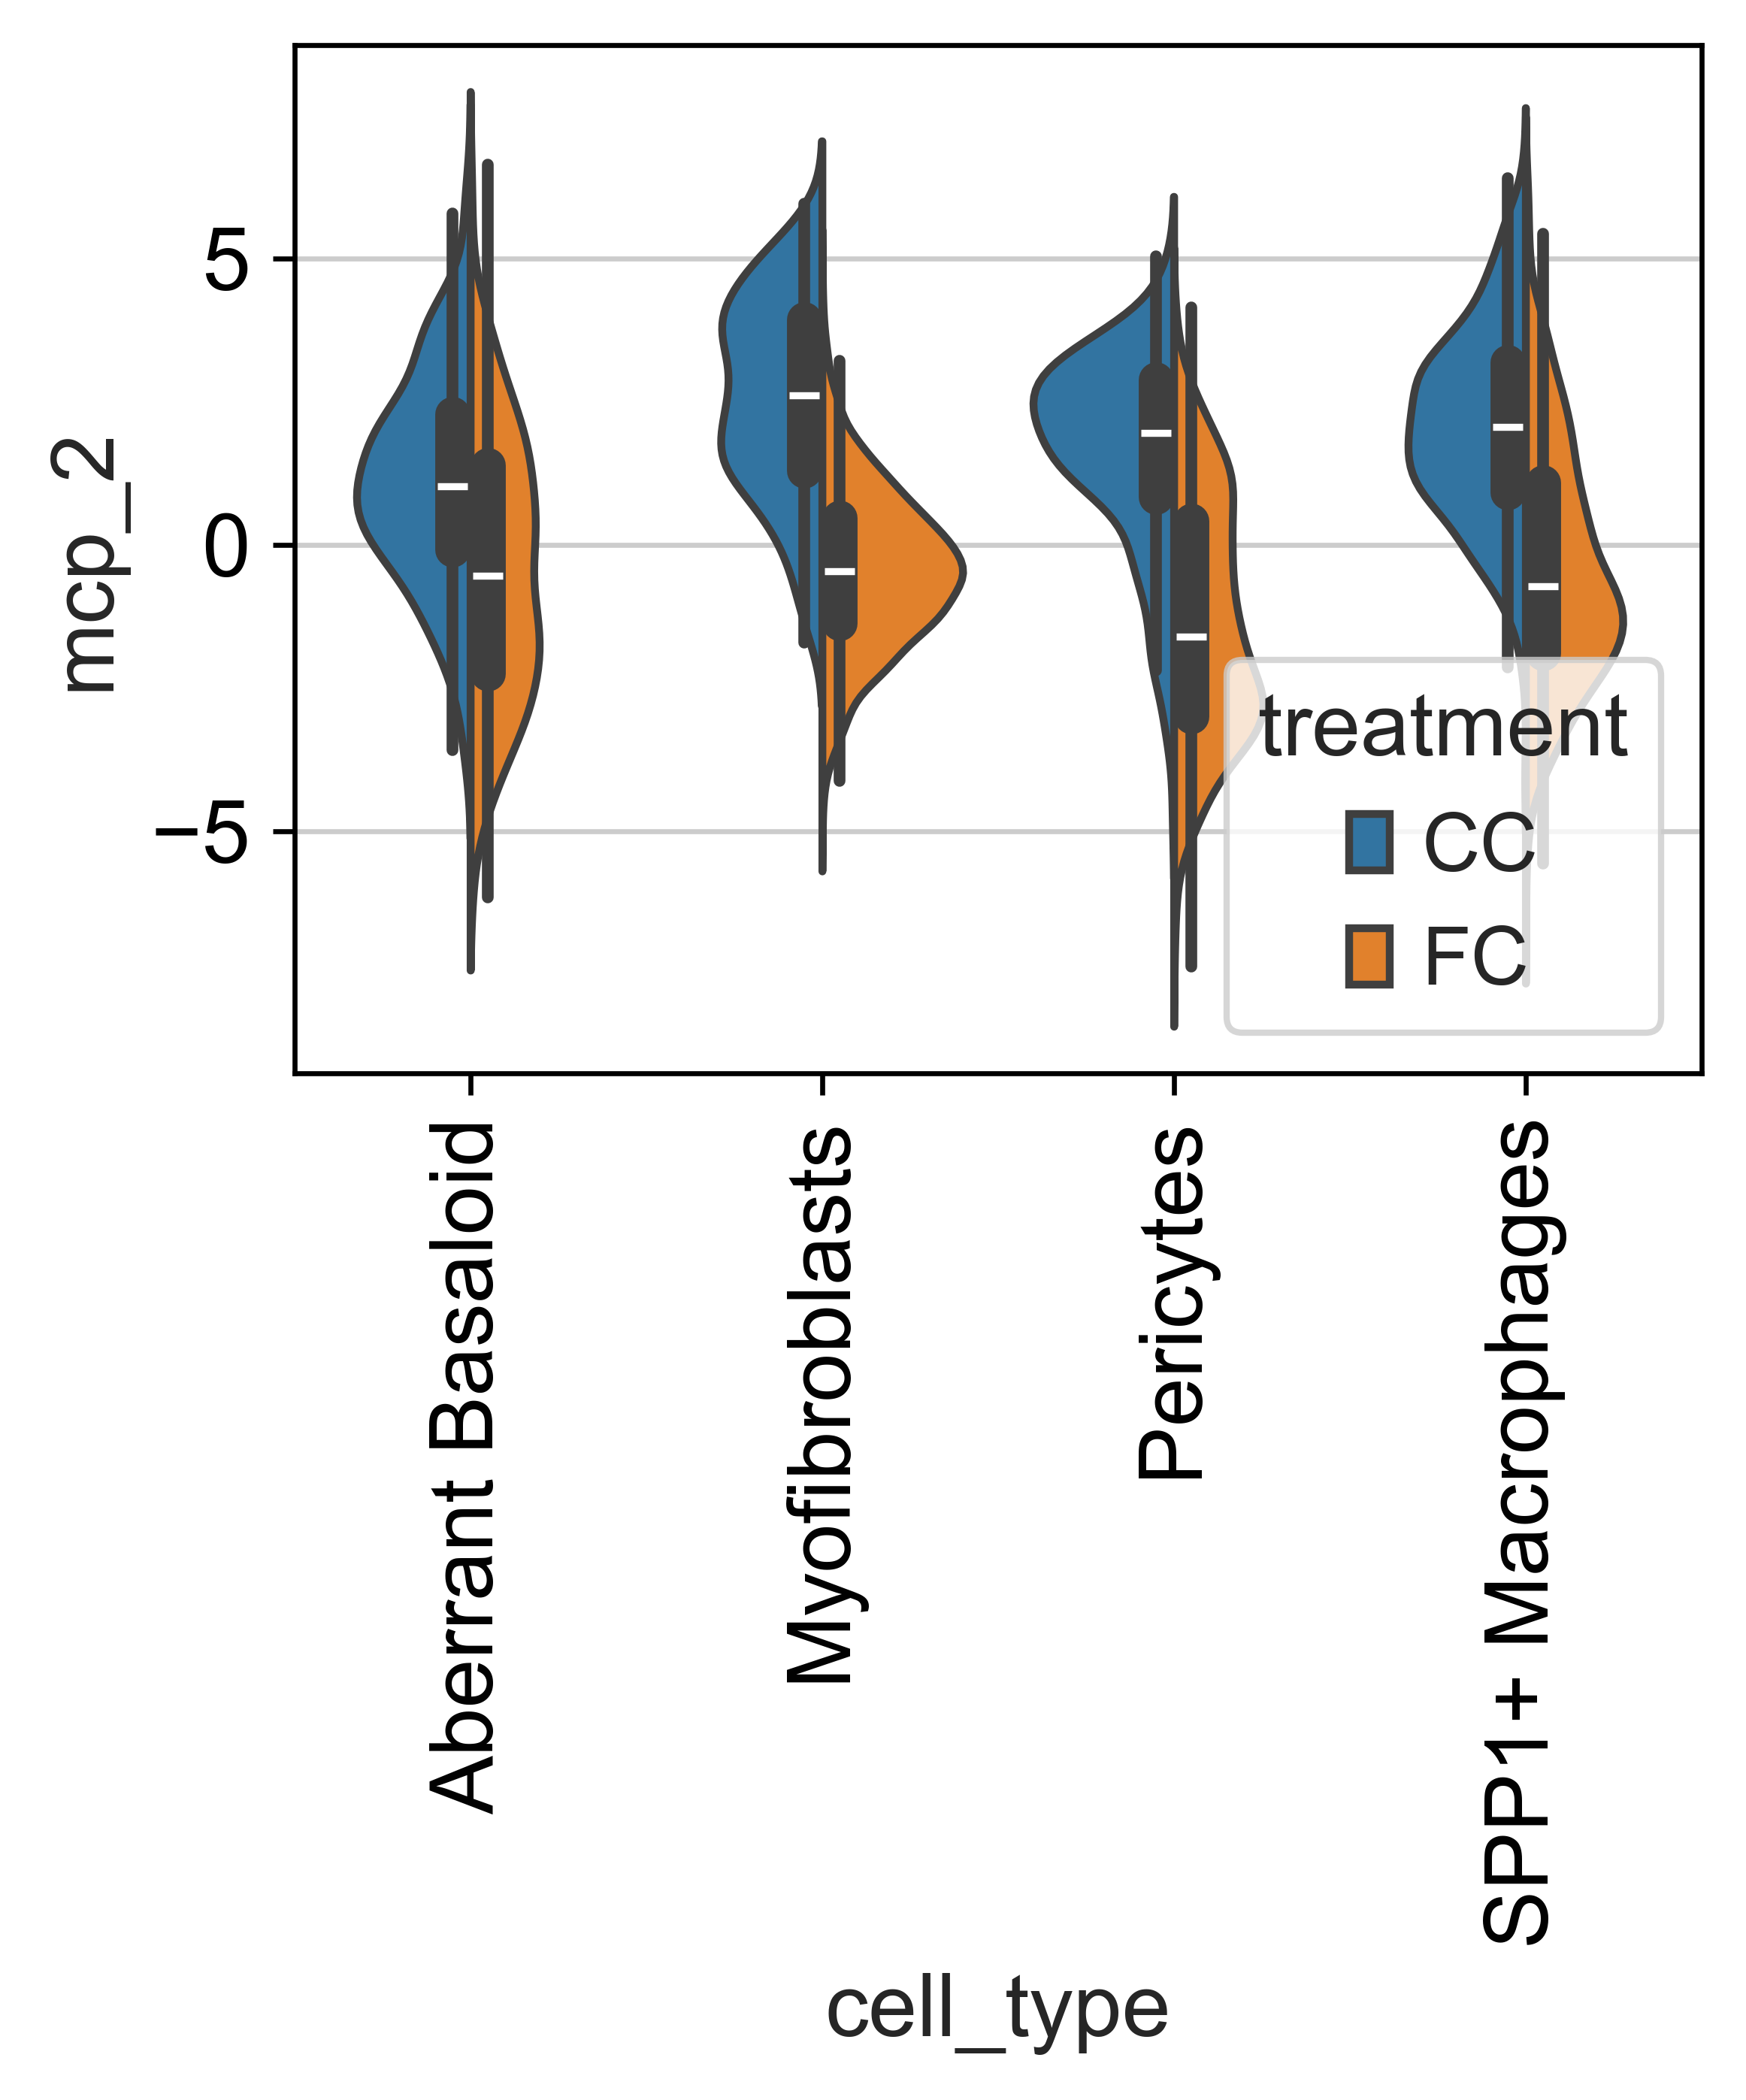

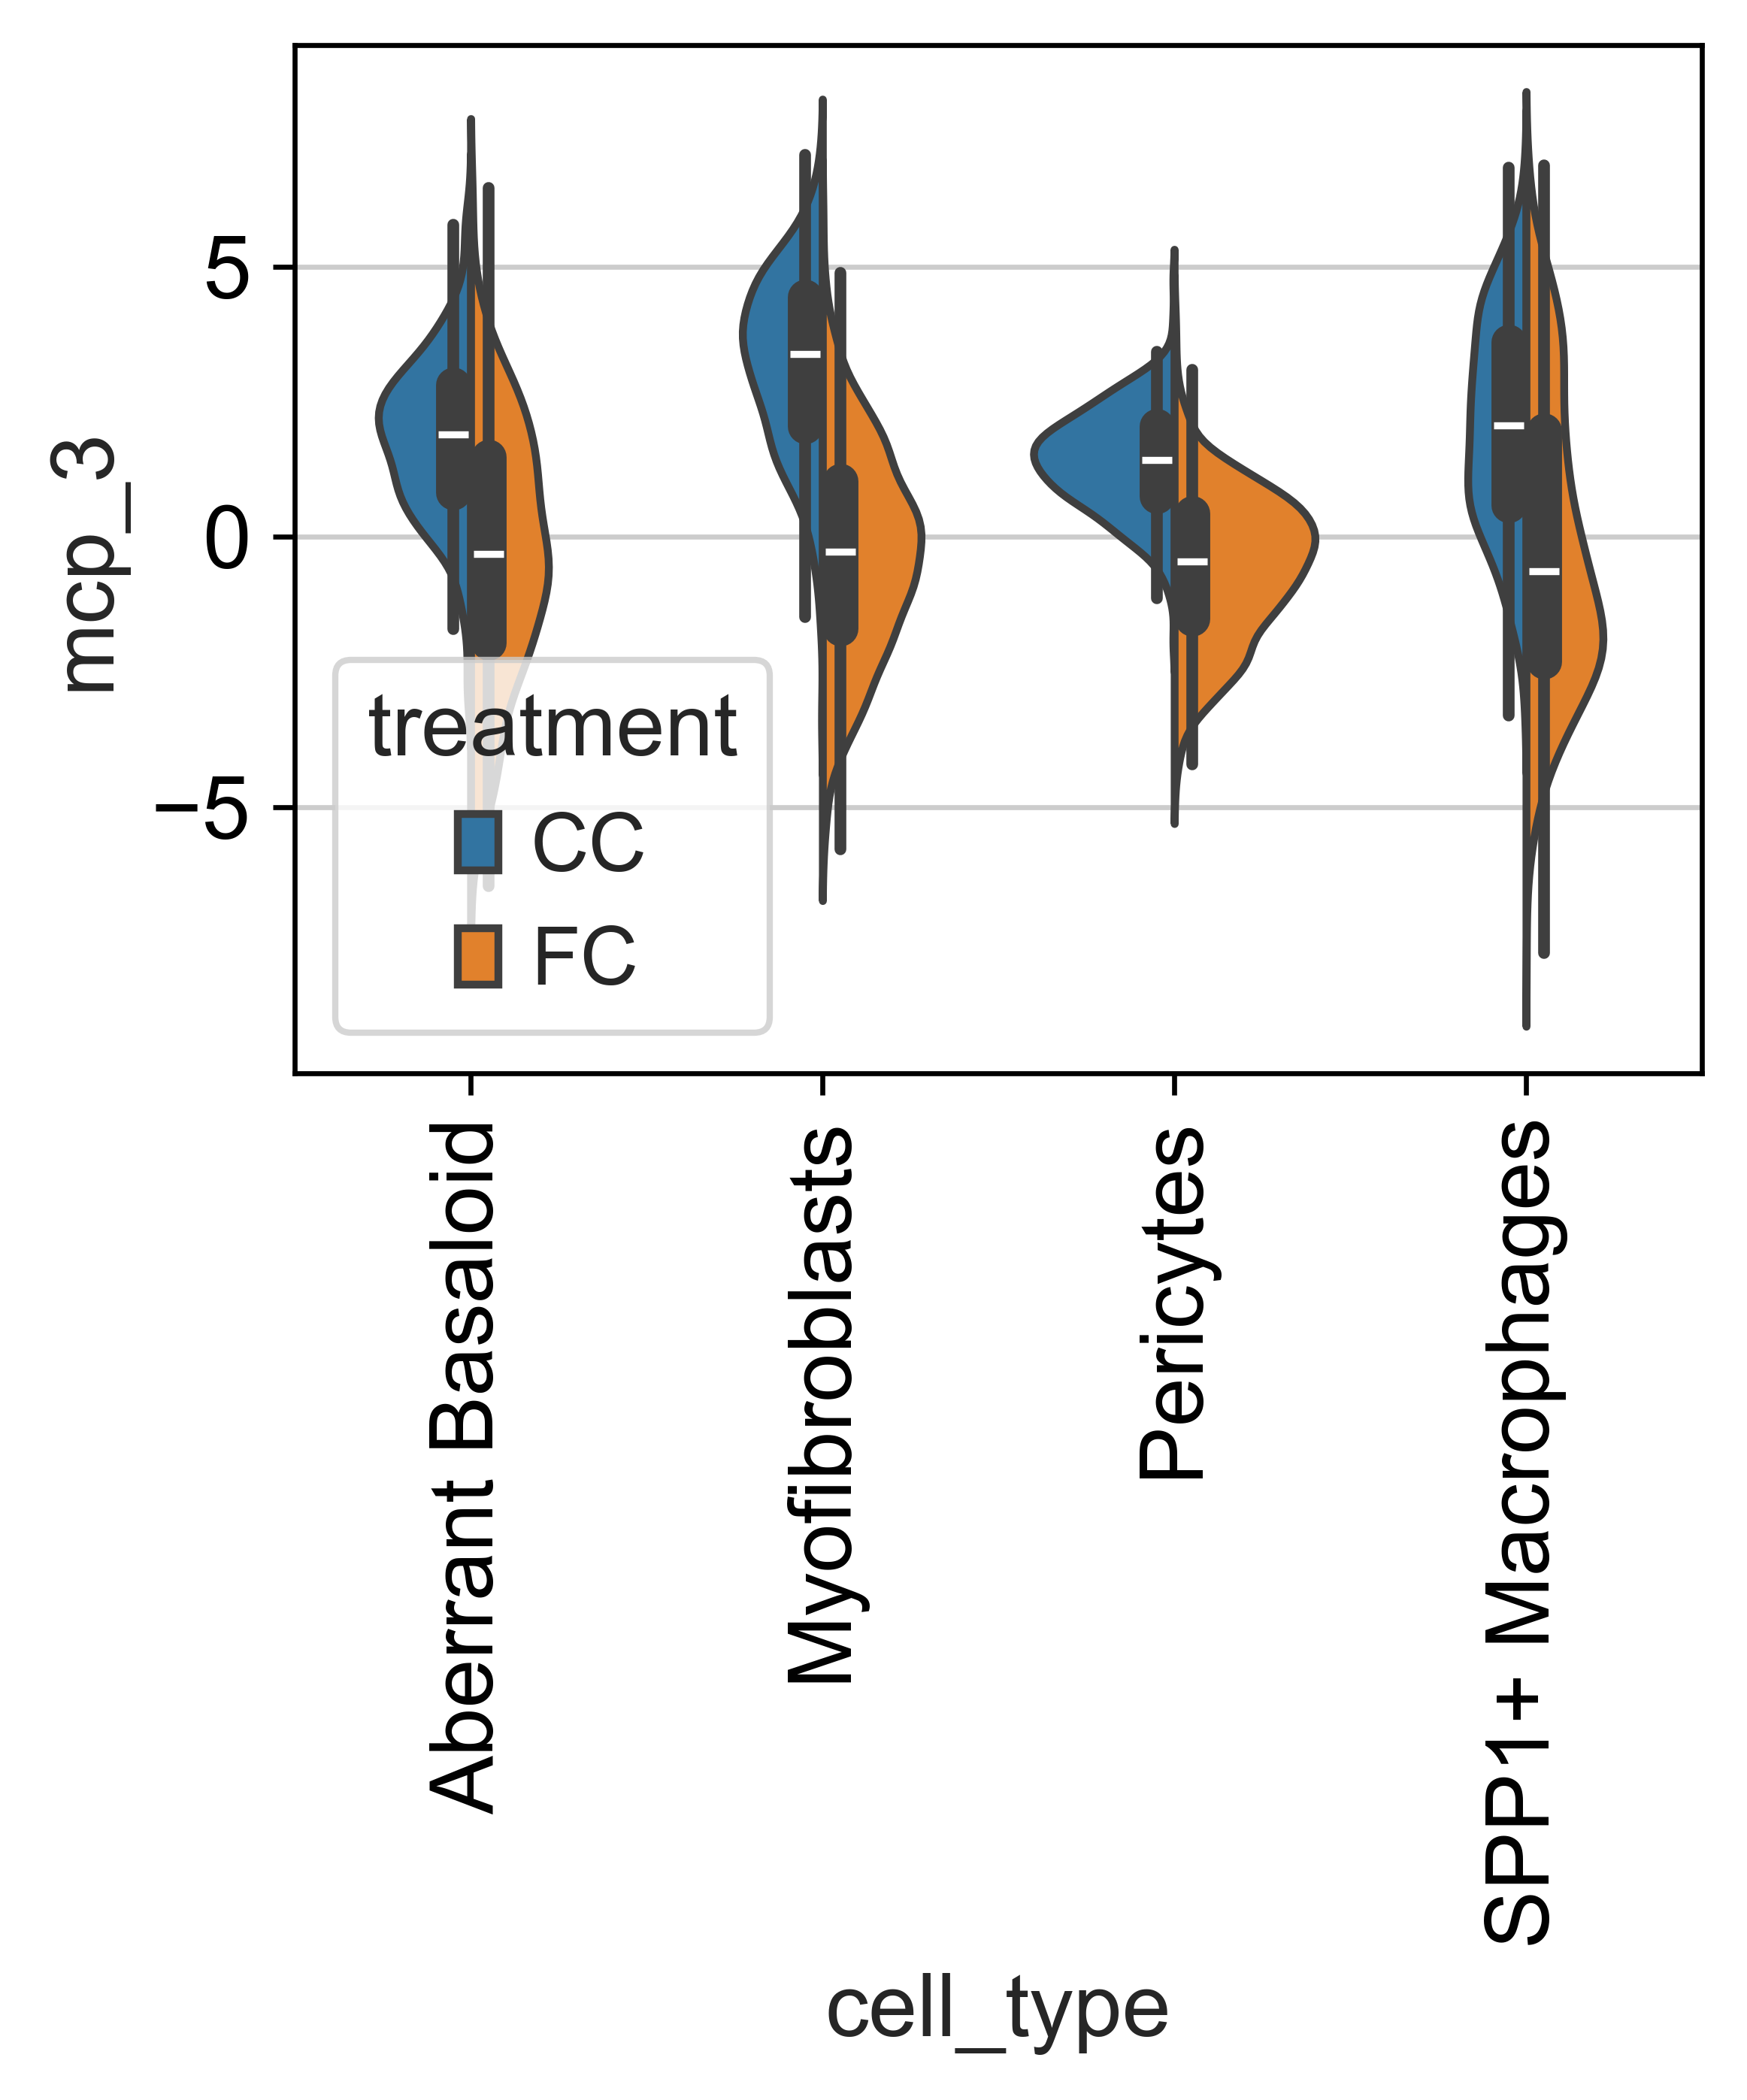

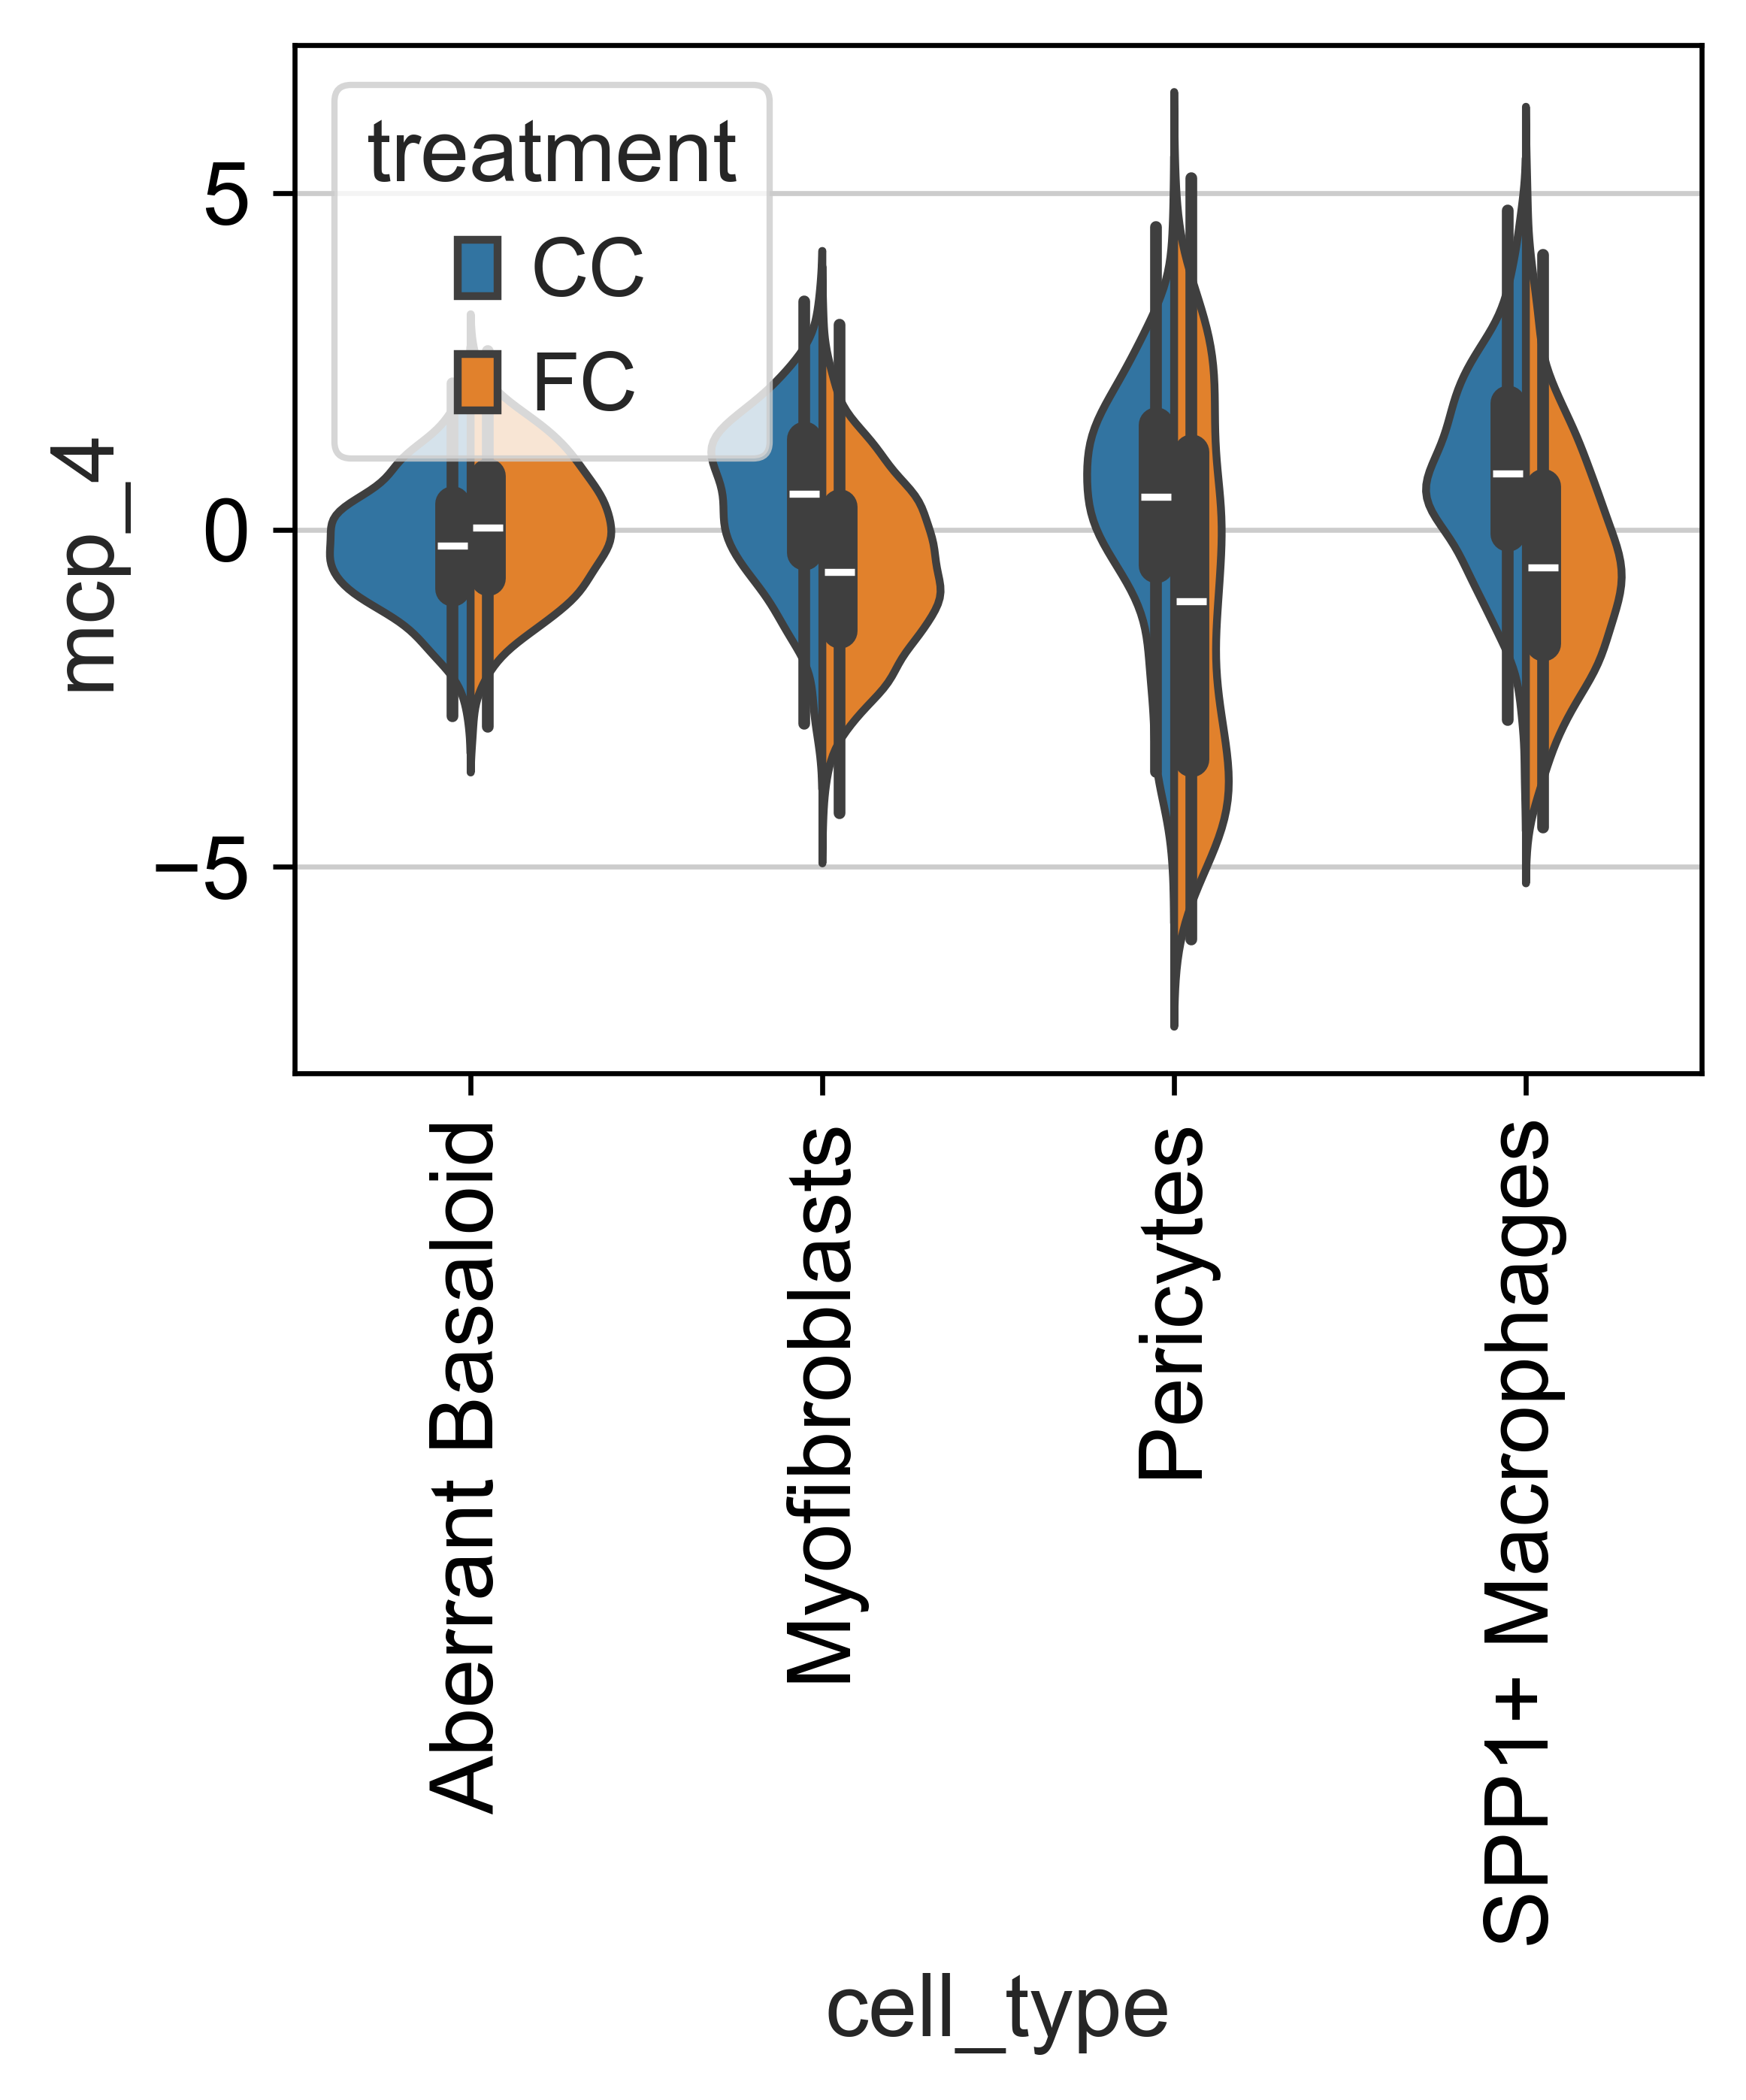

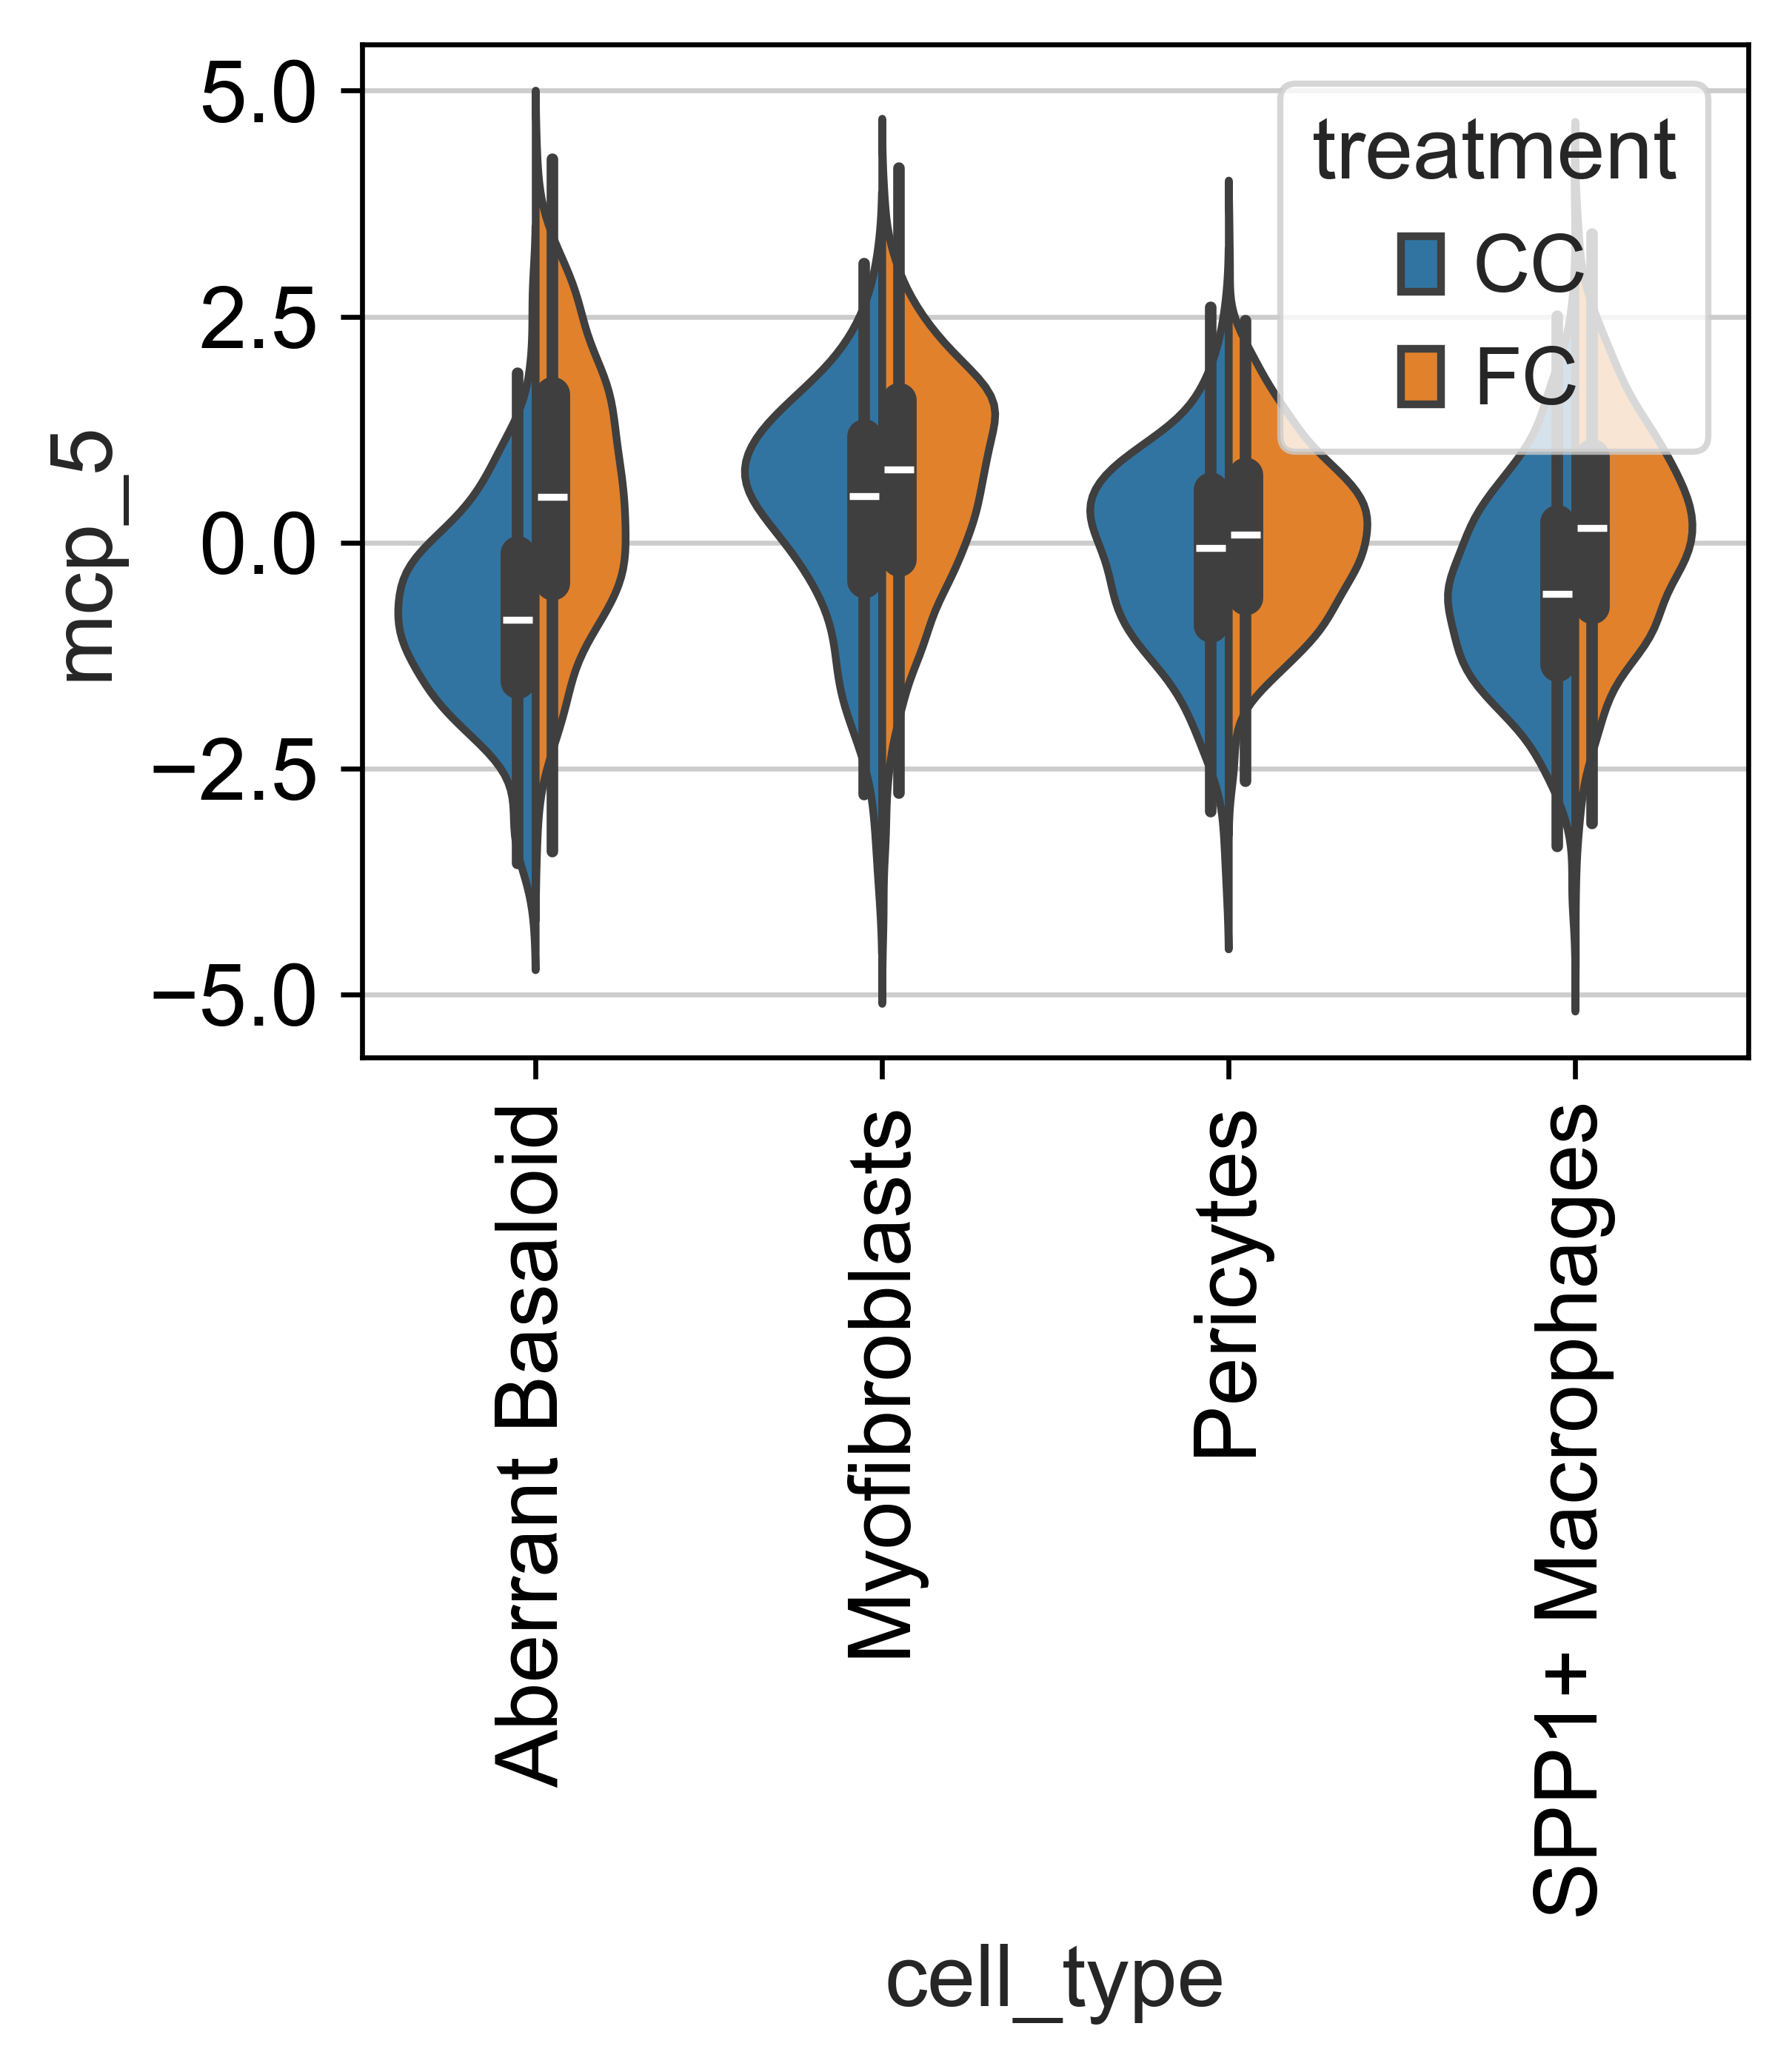

In [131]:
dl = pt.tl.Dialogue(
    sample_id="sample",
    celltype_key="cell_type",
    n_counts_key="n_counts",
    n_mpcs=6,
)
for i in range(6):
    plt.figure(figsize=(4, 3))
    dl.plot_split_violins(adata,
                      split_key="treatment",
                      celltype_key="cell_type",
                      split_which=("CC", "FC"),
                      mcp=f"mcp_{i}")
    plt.show()

In [132]:
extrema_genes["mcp_3"]["SMC"]

names     scores  logfoldchanges          pvals      pvals_adj
0          MGP  22.400072        4.526630   4.700424e-70   1.699015e-66
1        ADIRF  21.182148        3.269258   3.049894e-65   9.186788e-62
2      ADAMTS1  18.045515        3.632643   1.120489e-51   2.892943e-48
3          VIM  17.536711        2.666296   5.878630e-49   1.328056e-45
4          HGF  15.548748        5.445532   6.585282e-37   9.917983e-34
...        ...        ...             ...            ...            ...
18068    CEBPD -16.418137       -3.458331   2.170023e-44   4.357647e-41
18069     IER3 -23.640154       -4.877723   2.545902e-75   1.150302e-71
18070      IL6 -27.982203       -6.623892   4.118508e-85   2.481127e-81
18071    NAMPT -30.710665       -5.684196   1.348408e-96   1.218489e-92
18072     SOD2 -39.503445       -6.875286  6.214520e-131  1.123150e-126

[18073 rows x 5 columns]